**Сборный проект №1 - Исследование продаж видеоигр**

**Описание исследования**

Данные, используемые в исследовании, - исторические данные о продажах игр (оценки пользователей и экспертов, жанры и платформы) интернет-магазина «Стримчик», который продаёт по всему миру компьютерные игры.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

**Цель исследования**

Выявить определяющие успешность игры закономерности. Отобрать данные, актуальные для планирования рекламной компании на 2017 год. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

**Задачи исследования**

- отобрать данные, актуальные для планирования рекламной компании
- определить успешность игр
- определить факторы, влияющие на успешность игры
- составить портрет пользователя игр
- проверить гипотезы о равенстве средних оценок пользователей разных платформ и жанров

**Ход исследования**

Данные для исследования экспортируются из файла `games.csv`. О качестве данных информации нет, поэтому прежде чем приступать к исследованию данных нужно провести предварительную обработку - проверить на наличие ошибок, возможность исправления ошибок и заполнения пропусков, которые не приведут к искажению результатов исследования. Также создадим дополнительные признаки, которые помогут в исследовании.

Сформулируем основные этапы проекта:

- обзор исходных данных
- предобработка данных (преобразование типов данных, обработка пропусков и дубликатов)
- исследовательский анализ данных
- выборка актуального периода данных
- составление портрета пользователя каждого региона
- проверка гипотез
- оформление выводов по исследованию

**Исходные данные**

Name — название игры

Platform — платформа

Year_of_Release — год выпуска

Genre — жанр игры

NA_sales — продажи в Северной Америке (миллионы проданных копий)

EU_sales — продажи в Европе (миллионы проданных копий)

JP_sales — продажи в Японии (миллионы проданных копий)

Other_sales — продажи в других странах (миллионы проданных копий)

Critic_Score — оценка критиков (максимум 100)

User_Score — оценка пользователей (максимум 10)

Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board).

# Изучение общей информации

## Изучение файлов с данными, получение общей информации, загрузка библиотек

Загрузим нужные для исследования библиотеки

In [282]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy import stats
import pylab
import re
import plotly
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go

#увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 9,6

import warnings
warnings.filterwarnings('ignore')

Загрузим и прочтём файл с данными

In [283]:
try:
    df = pd.read_csv('/datasets/games.csv')
except:
    df = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv')

In [284]:
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [285]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [286]:
df.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


**Выводы**

Для исследования представлены данные по продажам видеоигр, содержащиеся в 11 параметрах и 16 715 записей с 1980 по 2016 гг.

Отметим, что:
- в данных присутствуют пропуски - в признаках `Rating`, `User_score` и `Critic_Score` пропущено от 40% до 51%
- названия всех столбцов содержат верхний регистр
- тип данных в нескольких столбцах неоптимальный - непрерывный тип данных в столбце с годом выпуска и качественный тип данных по оценкам пользователей

Необходимо обработать данные перед их исследованием


In [287]:
#названия столбцов к нижнему регистру
df.columns = df.columns.str.lower()

## Нахождение и ликвидация пропусков

In [288]:
print(df.isna().sum())
print(df.isna().sum() / df.shape[0])

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64
name               0.000120
platform           0.000000
year_of_release    0.016093
genre              0.000120
na_sales           0.000000
eu_sales           0.000000
jp_sales           0.000000
other_sales        0.000000
critic_score       0.513192
user_score         0.400897
rating             0.404786
dtype: float64


Пропусков в столбце `year_of_release` менее 2%.

Да, это немного, но этот параметр один из ключевых. Вместе с тем заполнение пропусков в нём модой/медианой/средним с большой долей вероятности приведёт к смещению статистик и исказит результаты исследования.

Выбирая между потерей данных и искажением статистик делаем выбор в пользу первого варианта. Но перед этим посмотрим на цифры продаж и оценок в строках с пропусками в `year_of_release`


In [289]:
df[df['year_of_release'].isna()].describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score
count,0.0,269.000000,269.000000,269.000000,269.000000,154.000000
mean,NaN,0.219888,0.090929,0.024907,0.032007,67.584416
std,NaN,0.424907,0.207933,0.090160,0.075546,14.828740
min,NaN,0.000000,0.000000,0.000000,0.000000,22.000000
25%,NaN,0.010000,0.000000,0.000000,0.000000,57.000000
50%,NaN,0.090000,0.020000,0.000000,0.010000,70.000000
75%,NaN,0.240000,0.100000,0.000000,0.030000,78.000000
max,NaN,4.260000,2.360000,0.770000,0.710000,94.000000


In [290]:
df[df['year_of_release'].isna()].quantile(0.98)

year_of_release        NaN
na_sales            1.5484
eu_sales            0.5920
jp_sales            0.2828
other_sales         0.2556
critic_score       91.0000
Name: 0.98, dtype: float64

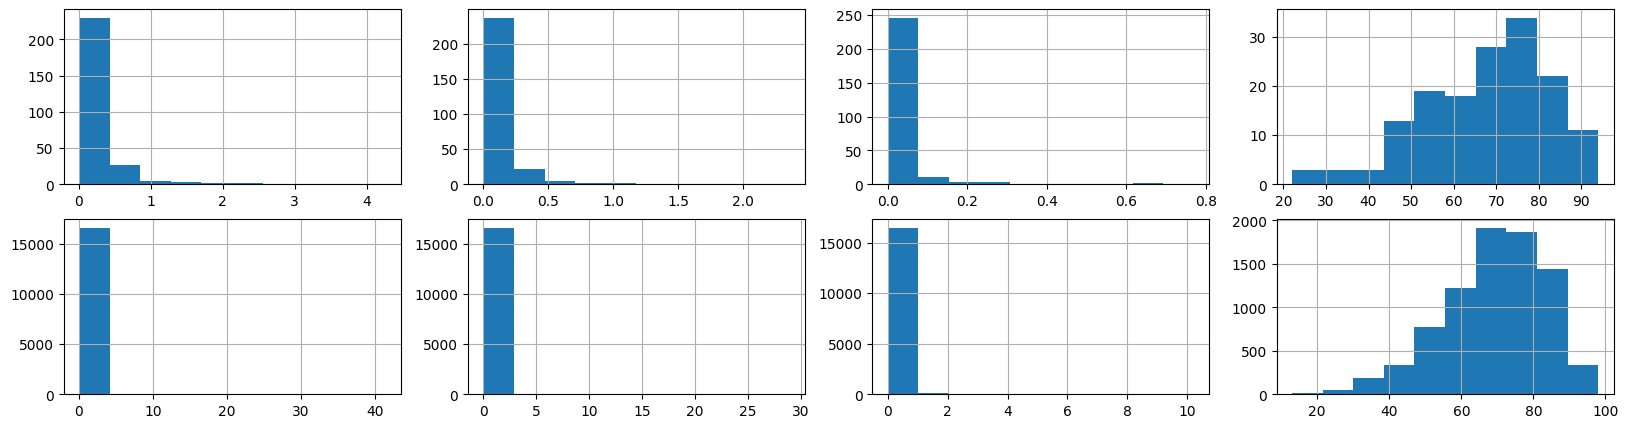

In [291]:
plt.figure(figsize=(20,5))

pylab.subplot(2, 4, 1)
df[df['year_of_release'].isna()]['na_sales'].hist()

pylab.subplot(2, 4, 2)
df[df['year_of_release'].isna()]['eu_sales'].hist()

pylab.subplot(2, 4, 3)
df[df['year_of_release'].isna()]['jp_sales'].hist()

pylab.subplot(2, 4, 4)
df[df['year_of_release'].isna()]['critic_score'].hist()

pylab.subplot(2, 4, 5)
df['na_sales'].hist()

pylab.subplot(2, 4, 6)
df['eu_sales'].hist()

pylab.subplot(2, 4, 7)
df['jp_sales'].hist()

pylab.subplot(2, 4, 8)
df['critic_score'].hist();

В целом распределения продаж по регионам и оценок критиков в строках с пропусками в годах выпуска и в целом по набору данных схожи. Но интересно посмотреть на игры с "выбросами" в продажах в NA и EU

In [292]:
df[(df['year_of_release'].isna()) &
   ((df['na_sales'] > 3) | (df['eu_sales'] > 2))]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E


Цифры продаж по регионам неплохие, не хочется терять эти записи. Можно заметить, что в названии игры присутствует год. В практике игр он совпадает с годом выпуска (либо выходит годом ранее на несколько месяцев, но это не критично). Проверим ещё несколько записей

In [293]:
df[df['year_of_release'].isna()].tail()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.0,0.0,0.0,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.0,0.0,0.0,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.0,0.0,0.0,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.0,0.0,0.0,NaN,NaN,NaN
16522,Virtua Quest,GC,NaN,Role-Playing,0.01,0.0,0.0,0.0,55.0,5.5,T


Да, мы видим, что существуют и другие игры с годом в названии. Используем это для более качественного заполнения пропусков и удаления меньшего количества записей

In [294]:
years = list(range(1980,2017))

def production_year(data):
  for el in re.findall(r'\d{4}', str(data)):
    if int(el) in years:
      return int(el)

In [295]:
df['year'] = df['name'].apply(production_year)
df['year_diff'] = df['year'] - df['year_of_release']
df['year_diff'].value_counts()

 1.0     414
 0.0     363
 2.0      17
-1.0       7
-2.0       3
-3.0       2
-7.0       2
 8.0       1
 4.0       1
 5.0       1
 14.0      1
 6.0       1
-6.0       1
-8.0       1
Name: year_diff, dtype: int64

In [296]:
print(len(df[~((df['year_diff'] == 1.0) | (df['year_diff'] == 0.0) |
               (df['year_diff'].isna()))]))
print(len(df[~((df['year_diff'] == 1.0) | (df['year_diff'] == 0.0) |
               (df['year_diff'].isna()))]) / len(df[~df['year_diff'].isna()]))
print(len(df[(df['year_diff'] == 1.0) | (df['year_diff'] == 0.0)]))
print(len(df[(df['year_diff'] == 1.0) | (df['year_diff'] == 0.0)]) /
      len(df[~df['year_diff'].isna()]))
print(len(df[~df['year_diff'].isna()]))

38
0.046625766871165646
777
0.9533742331288344
815


Отметим, что на 95% данных мы верно определили год выпуска либо завысили год на единицу. Это неплохой результат. Посмотрим на строки с пропусками

In [297]:
len(df[(df['year_of_release'].isna()) & (~df['year'].isna())])

17

Это означает, что мы можем заполнить пропуски года выпуска в 17 строках

In [298]:
df[(df['year_of_release'].isna()) & (~df['year'].isna())].head(3)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,year,year_diff
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E,2004.0,NaN
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E,2004.0,NaN
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN,2006.0,NaN


In [299]:
df.loc[(df['year_of_release'].isna()) & (~df['year'].isna()), 'year_of_release'] = df['year']

Проверим корректность заполнения

In [300]:
df.iloc[[183, 377, 475]]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,year,year_diff
183,Madden NFL 2004,PS2,2004.0,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E,2004.0,NaN
377,FIFA Soccer 2004,PS2,2004.0,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E,2004.0,NaN
475,wwe Smackdown vs. Raw 2006,PS2,2006.0,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN,2006.0,NaN


Удалим временные столбцы

In [301]:
df = df.drop(['year', 'year_diff'], axis=1)

От остальных строк с пропусками в `year_of_release` придётся избавиться

In [302]:
print(df['year_of_release'].isna().sum())
print(df['year_of_release'].isna().sum() / df.shape[0])

252
0.015076278791504636


In [303]:
print(df.shape)
df = df[~df['year_of_release'].isna()]
print(df.shape)

(16715, 11)
(16463, 11)


In [304]:
print(df.isna().sum())
print(df.isna().sum() / df.shape[0])

name                  2
platform              0
year_of_release       0
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8468
user_score         6612
rating             6684
dtype: int64
name               0.000121
platform           0.000000
year_of_release    0.000000
genre              0.000121
na_sales           0.000000
eu_sales           0.000000
jp_sales           0.000000
other_sales        0.000000
critic_score       0.514366
user_score         0.401628
rating             0.406001
dtype: float64


In [305]:
df[(df['name'].isna()) | (df['genre'].isna())]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Строки с пропусками в названии и жанре одни и те же, очистим от них набор данных

In [306]:
print(df.shape)
df = df[~df['genre'].isna()]
print(df.shape)

(16463, 11)
(16461, 11)


In [307]:
print(df.isna().sum())
print(df.isna().sum() / df.shape[0])

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8466
user_score         6610
rating             6682
dtype: int64
name               0.000000
platform           0.000000
year_of_release    0.000000
genre              0.000000
na_sales           0.000000
eu_sales           0.000000
jp_sales           0.000000
other_sales        0.000000
critic_score       0.514307
user_score         0.401555
rating             0.405929
dtype: float64


In [308]:
print(len(df[df['rating'].isna()]))
print(len(df[(df['critic_score'].isna()) & (df['rating'].isna())]))
print(len(df[((df['critic_score'].isna()) | (df['user_score'].isna())) &
             (df['rating'].isna())]))
print(len(df[((df['critic_score'].isna()) & (~df['user_score'].isna())) &
             (df['rating'].isna())]))
print(len(df[((~df['critic_score'].isna()) & (df['user_score'].isna())) &
             (df['rating'].isna())]))

6682
6600
6609
61
9


Мы видим, что почти в 99% строк с пропусками в столбце `rating`, также пропущены значения оценок критиков либо оценок пользователей. Тут мы можем предположить, что рейтинг игре выставляется в том числе на основе оценок

Количество пропусков в столбцах `critic_score` и `user_score` достаточно велико - более 40%. Их заполнение любыми статистиками с большой долей вероятности исказит результат дальнейшей работы с данными.

А вот пропуски в качественном столбце rating лучше обработать и заполнить "заглушкой", чтобы при анализе рейтинга не терять данные и не делать неправильные выводы

In [309]:
df['rating'] = df['rating'].fillna('no info')

In [310]:
print(df.isna().sum())
print(df.isna().sum() / df.shape[0])

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8466
user_score         6610
rating                0
dtype: int64
name               0.000000
platform           0.000000
year_of_release    0.000000
genre              0.000000
na_sales           0.000000
eu_sales           0.000000
jp_sales           0.000000
other_sales        0.000000
critic_score       0.514307
user_score         0.401555
rating             0.000000
dtype: float64


На этом завершим обработку пропусков и ещё раз вернёмся к пропускам в оценках - выясним, есть ли связь между пропусками в оценках и годом выпуска игр

<Axes: >

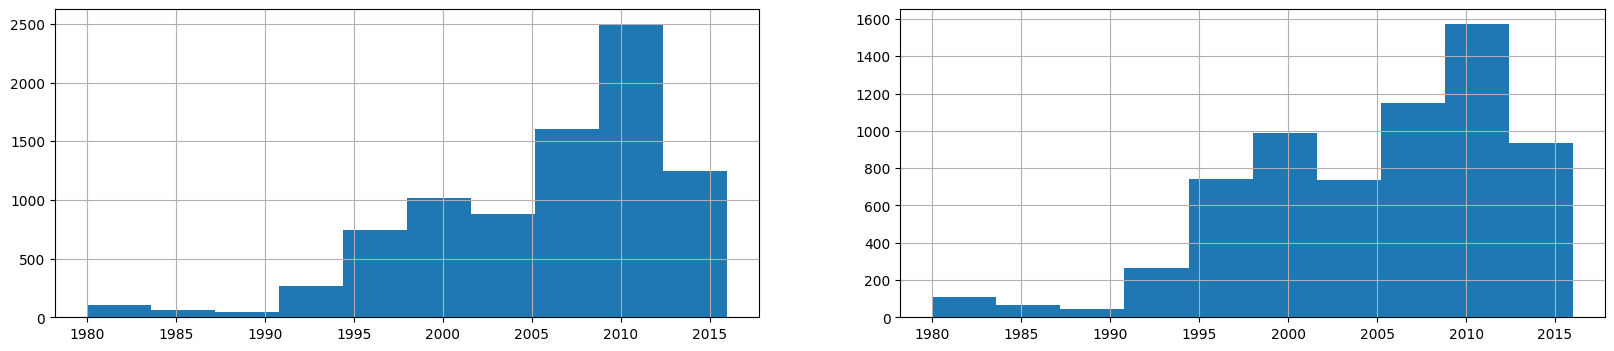

In [311]:
plt.figure(figsize=(20,4))

pylab.subplot(1, 2, 1)
df[df['critic_score'].isna()]['year_of_release'].hist()

pylab.subplot(1, 2, 2)
df[df['user_score'].isna()]['year_of_release'].hist()

Пропуски в столбцах `critic_score` и `user_score` присутствуют на всём протяжении анализируемого периода, то есть причина пропусков не связана с годом выпуска игры. Возможные причины пропусков в этих столбцах:
- некорректная выгрузка данных
- низкая популярность игр

In [312]:
print(len(df[(df['critic_score'].isna()) & ((~df['user_score'].isna()))]))
print(len(df[(~df['critic_score'].isna()) & ((df['user_score'].isna()))]))
print(len(df[(df['critic_score'].isna()) & ((df['user_score'].isna()))]))

1889
33
6577


В большинстве случаев отсутствия значения в столбце `critic_score`, значение отсутствует и в столбце `user_score`

# Подготовка данных

## Приведение данных к нужным типам

In [313]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16461 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16461 non-null  object 
 1   platform         16461 non-null  object 
 2   year_of_release  16461 non-null  float64
 3   genre            16461 non-null  object 
 4   na_sales         16461 non-null  float64
 5   eu_sales         16461 non-null  float64
 6   jp_sales         16461 non-null  float64
 7   other_sales      16461 non-null  float64
 8   critic_score     7995 non-null   float64
 9   user_score       9851 non-null   object 
 10  rating           16461 non-null  object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


Нужно заменить тип данных в:

- `year_of_release` на int (целочисленный)
- `user_score` на float64

In [314]:
df = df.astype({'year_of_release': 'Int64'})

In [315]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16461 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16461 non-null  object 
 1   platform         16461 non-null  object 
 2   year_of_release  16461 non-null  Int64  
 3   genre            16461 non-null  object 
 4   na_sales         16461 non-null  float64
 5   eu_sales         16461 non-null  float64
 6   jp_sales         16461 non-null  float64
 7   other_sales      16461 non-null  float64
 8   critic_score     7995 non-null   float64
 9   user_score       9851 non-null   object 
 10  rating           16461 non-null  object 
dtypes: Int64(1), float64(5), object(5)
memory usage: 1.5+ MB


Определим, почему тип `user_score` object: посмотрим на уникальные значения столбца

In [316]:
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Среди значений оценок пользователей присутствует значение 'tbd', означающее, что значение уточняется. Можно предположить, что это значение проставляется новым приложениям. Проверим эту гипотезу.

<Axes: >

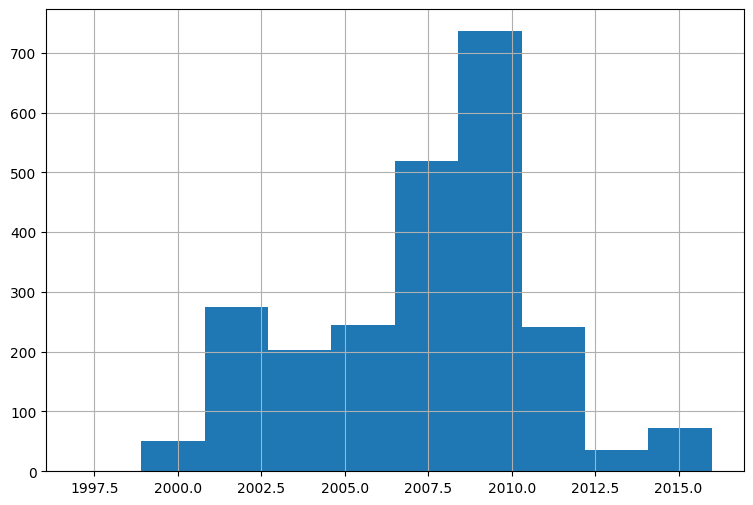

In [317]:
df[df['user_score'] == 'tbd']['year_of_release'].hist()

Нет, как видим, данное значение встречается в приложениях с разным годом выпуска.

Также проверим, есть ли какие-то аномалии по жанрам и рейтингам

In [318]:
df[df['user_score'] == 'tbd']['genre'].value_counts()

Misc            440
Sports          408
Action          368
Simulation      233
Racing          229
Puzzle          208
Adventure       156
Platform        135
Shooter          95
Strategy         39
Fighting         37
Role-Playing     30
Name: genre, dtype: int64

In [319]:
df['genre'].value_counts()

Action          3308
Sports          2318
Misc            1721
Role-Playing    1481
Shooter         1296
Adventure       1293
Racing          1229
Platform         878
Simulation       857
Fighting         838
Strategy         673
Puzzle           569
Name: genre, dtype: int64

Явно выраженных аномалий оценок 'tbd' по жанрам нет

In [320]:
df[df['user_score'] == 'tbd']['rating'].value_counts()

E          1549
T           369
E10+        361
no info      50
M            42
EC            7
Name: rating, dtype: int64

In [321]:
df['rating'].value_counts()

no info    6682
E          3930
T          2905
M          1537
E10+       1394
EC            8
K-A           3
AO            1
RP            1
Name: rating, dtype: int64

С бОльшим соотношением приложения со значением 'tbd' имеют рейтинг E.

Заполним данное значение пустой строкой, так как данное значение по своей сути и является пропущенным значением.

Причиной большого количества пропусков в столбце с оценками экспертов, с оценками пользователей и с рейтингами может послужить то, что рейтинги выставляются экспертами

In [322]:
df.loc[df['user_score'] == 'tbd', 'user_score'] = np.NaN

In [323]:
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', '8.8', '6.9', '9.4', '6.8', '6.1',
       '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6', '3.7',
       '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9', '3.1',
       '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3', '2.7',
       '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0', '1.6',
       '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2', '2.3',
       '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'], dtype=object)

Изменим тип данных

In [324]:
df['user_score'] = df['user_score'].astype(float)

In [325]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16461 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16461 non-null  object 
 1   platform         16461 non-null  object 
 2   year_of_release  16461 non-null  Int64  
 3   genre            16461 non-null  object 
 4   na_sales         16461 non-null  float64
 5   eu_sales         16461 non-null  float64
 6   jp_sales         16461 non-null  float64
 7   other_sales      16461 non-null  float64
 8   critic_score     7995 non-null   float64
 9   user_score       7473 non-null   float64
 10  rating           16461 non-null  object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.5+ MB


Типы данных обработаны

## Нахождение и исправление аномалий и ошибок

Проверим данные на неявные дубликаты

In [326]:
df['platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [327]:
df['genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

In [328]:
df['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 41., 36., 31., 27., 35., 26., 19., 28., 23.,
       24., 21., 17., 13.])

Проверим данные на полные дубликаты

In [329]:
df.duplicated().sum()

0

Полных дубликатов нет, но мы продолжаем поиск дубликатов, ищем неявные дубликаты по нескольким признакам

In [330]:
df.duplicated(subset=['name', 'platform']).sum()

3

In [331]:
df[df.duplicated(subset=['name', 'platform'])]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1591,Need for Speed: Most Wanted,X360,2005,Racing,1.0,0.13,0.02,0.10,83.0,8.5,T
11715,Need for Speed: Most Wanted,PC,2012,Racing,0.0,0.06,0.00,0.02,82.0,8.5,T
16230,Madden NFL 13,PS3,2012,Sports,0.0,0.01,0.00,0.00,83.0,5.5,E


In [332]:
df[(df['name'] == 'Need for Speed: Most Wanted') & (df['platform'] == 'PC')]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
5972,Need for Speed: Most Wanted,PC,2005,Racing,0.02,0.23,0.0,0.04,82.0,8.5,T
11715,Need for Speed: Most Wanted,PC,2012,Racing,0.00,0.06,0.0,0.02,82.0,8.5,T


In [333]:
df[(df['name'] == 'Need for Speed: Most Wanted') & (df['platform'] == 'X360')]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1190,Need for Speed: Most Wanted,X360,2012,Racing,0.62,0.78,0.01,0.15,83.0,8.5,T
1591,Need for Speed: Most Wanted,X360,2005,Racing,1.00,0.13,0.02,0.10,83.0,8.5,T


In [334]:
df[(df['name'] == 'Madden NFL 13') & (df['platform'] == 'PS3')]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,Madden NFL 13,PS3,2012,Sports,2.11,0.22,0.0,0.23,83.0,5.5,E
16230,Madden NFL 13,PS3,2012,Sports,0.00,0.01,0.0,0.00,83.0,5.5,E


Игра Need for Speed: Most Wanted на платформах PC и X360 выходила в разные годы, не будем принимать эти записи за дубликаты, а вот продажи по игре Madden NFL 13 целесообразно объединить в одну запись, так как год выпуска один. Продажи по дубликату нулевые, поэтому просто удалим её

In [335]:
print(df.shape[0])
df = df.drop_duplicates(subset=['platform', 'year_of_release', 'name'])
print(df.shape[0])

16461
16460


# Исследовательский анализ данных

Создадим столбец с общими продажами

In [336]:
df['total_sales'] = df[['na_sales',
                        'eu_sales',
                        'jp_sales',
                        'other_sales']].sum(axis='columns')
#df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

In [337]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,no info,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,no info,31.38


Посчитаем, на каком количестве платформ выходила каждая игра

Text(0.5, 1.0, 'Топ-10 игр по универсальности платформ')

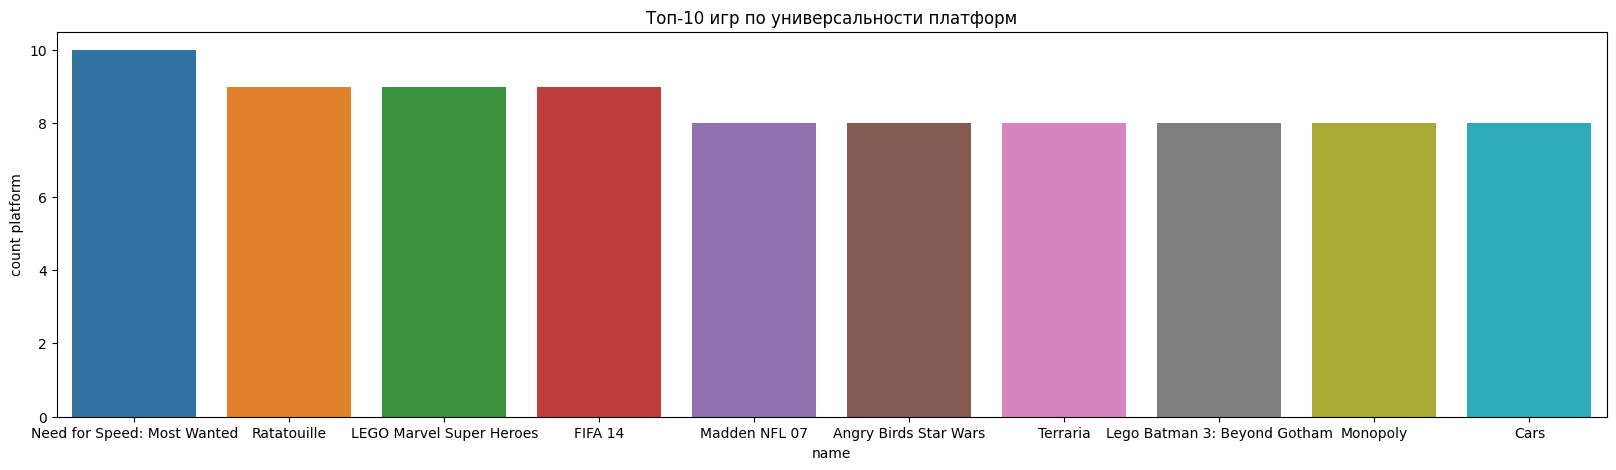

In [338]:
plt.figure(figsize=(20,5))
df_game_count_platform = (
    df[~df.duplicated(subset=['name', 'platform'])]
    .groupby('name')[['platform']]
    .count()
    .reset_index()
    .sort_values(by='platform', ascending=False)
    .head(10)
)
sns.barplot(data=df_game_count_platform, x='name', y='platform')
plt.ylabel('count platform')
plt.xlabel('name')
plt.title('Топ-10 игр по универсальности платформ')

Самая универсальная игра - Need for Speed: Most Wanted. Она выходита на максимальном количестве платформ (10)

Посмотрим, сколько игр выпускалось в разные годы

In [339]:
df_games_per_year_with_platform = (
    df.groupby('year_of_release')[['name']]
                       .count().reset_index()
                       .sort_values(by='name', ascending=False)
)
df_games_per_year_with_platform.columns = ['year_of_release',
                                           'game_count_with_platform']
df_games_per_year_with_platform.head()

,year_of_release,game_count_with_platform
28,2008,1429
29,2009,1427
30,2010,1255
27,2007,1198
31,2011,1137


Данные значения мы получили без учета игр-дубликатов по году выпуска (когда в один год игры выпускались на разных платформах).

Посчитаем также истинное количество игр без учета платформ

In [340]:
df_games_per_year_no_platform = (
    df[~df.duplicated(subset=['name', 'year_of_release'])]
                       .groupby('year_of_release')[['name']]
                       .count().reset_index()
                       .sort_values(by='name', ascending=False)
)
df_games_per_year_no_platform.columns = ['year_of_release',
                                         'game_count_no_platform']
df_games_per_year_no_platform.head()

,year_of_release,game_count_no_platform
28,2008,1039
29,2009,1001
30,2010,900
27,2007,885
31,2011,780


Объединим данные и сравним количество выпускаемых игр с учётом и без учёта платформ

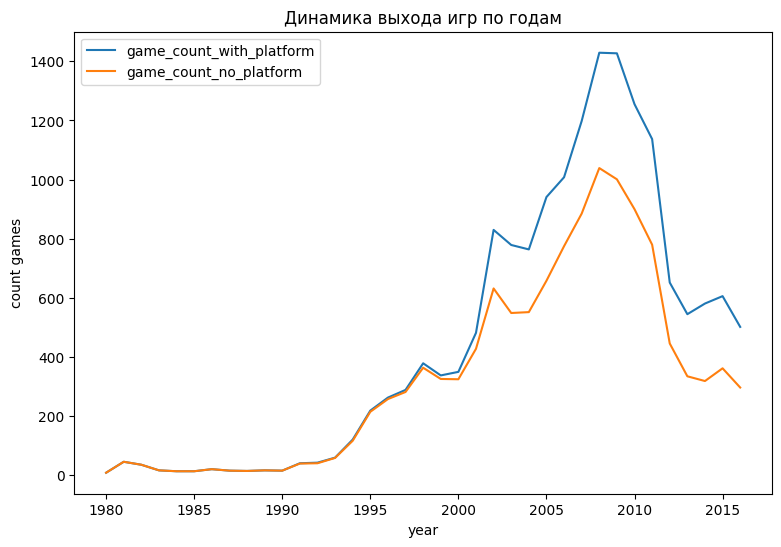

In [341]:
df_games_per_year = df_games_per_year_with_platform.merge(df_games_per_year_no_platform,
                                                          on='year_of_release')
df_games_per_year = df_games_per_year.set_index('year_of_release').sort_index()

plt.plot(df_games_per_year.index, df_games_per_year['game_count_with_platform'])
plt.plot(df_games_per_year.index, df_games_per_year['game_count_no_platform'])
plt.title('Динамика выхода игр по годам')
plt.xlabel('year')
plt.ylabel('count games')
plt.legend(df_games_per_year)

Мы обнаружили интересную закономерность - в период 90-х годов начинает набирать популярность выход игр на разных платформах, в то время как до 1990 года каждая игра выпускалась только на одной платформе. В первую очередь это связано с развитием рынка и увеличением количества платформ в целом. В том числе в целях высокого охвата на новой платформе в продажи запускали уже набравшие популярность игры на других платформах

Визуализируем развитие платформ и итоговых продаж по всем регионам с течением времени

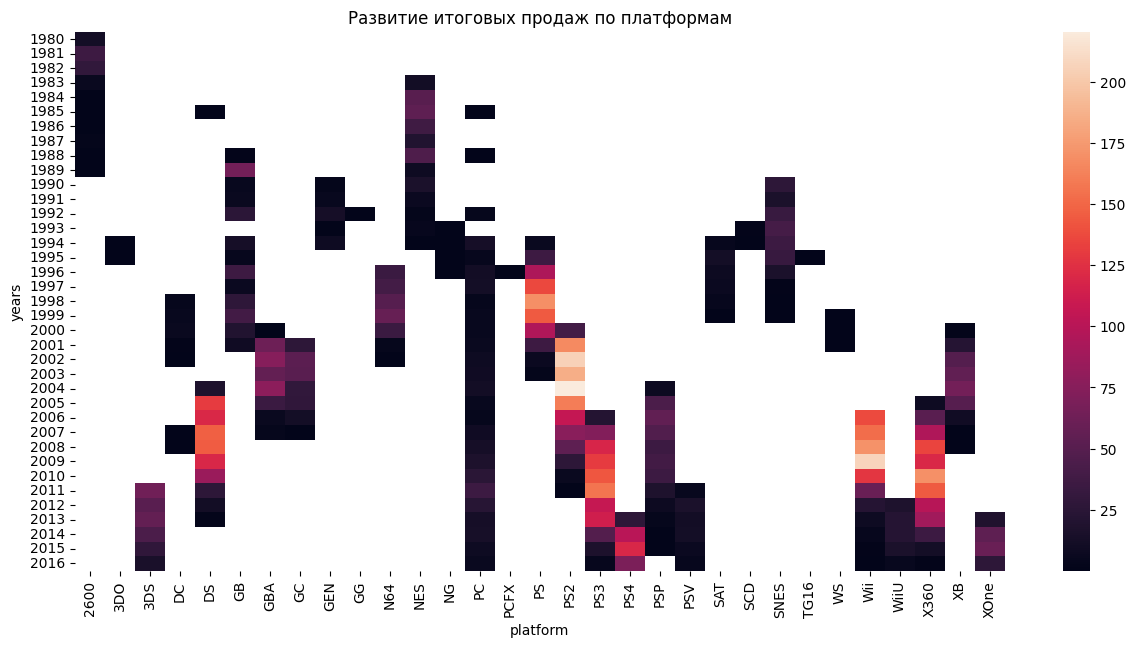

In [342]:
plt.figure(figsize=(15,7))
sns.heatmap(df.pivot_table(index='year_of_release', columns='platform',
                           values='total_sales', aggfunc='sum'))

plt.ylabel('years')
plt.xlabel('platform')
plt.title('Развитие итоговых продаж по платформам');

Отобразим запись по платформе DS 1985 года, данные похоже на артефакт, так как DS была выпущена только в 2004 году

In [343]:
df[(df['platform'] == 'DS') & (df['year_of_release'] == 1985)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
15957,Strongest Tokyo University Shogi DS,DS,1985,Action,0.0,0.0,0.02,0.0,NaN,NaN,no info,0.02


Избавимся от данного артефакта

In [344]:
df = df[~((df['platform'] == 'DS') & (df['year_of_release'] == 1985))]
df.shape[0]

16459

Найдем средний срок жизни каждой платформы

In [345]:
df_sales_by_year_by_platform = (
    df.pivot_table(index='year_of_release',
                   columns='platform',
                   values='total_sales',
                   aggfunc='sum')
    .reset_index()
)

my_series = (
    df_sales_by_year_by_platform[df.pivot_table(index='year_of_release',
                                                columns='platform',
                                                values='total_sales',
                                                aggfunc='sum')
    .reset_index().columns.tolist()].count()
)

df_platform_years_sales_count = my_series.to_frame(name='count_year_with_sales').reset_index()
df_platform_years_sales_count['percent'] = (
    df_platform_years_sales_count['count_year_with_sales'] /
    my_series.to_frame(name='count_year_with_sales')
    .loc['year_of_release', 'count_year_with_sales']
    * 100
)
df_platform_years_sales_count = df_platform_years_sales_count.sort_values(by='percent',
                                                                          ascending=False)
df_platform_years_sales_count = df_platform_years_sales_count.drop(index=0)
df_platform_years_sales_count.head(10)

,platform,count_year_with_sales,percent
14,PC,26,70.270270
6,GB,13,35.135135
12,NES,12,32.432432
29,X360,12,32.432432
20,PSP,12,32.432432
17,PS2,12,32.432432
27,Wii,11,29.729730
18,PS3,11,29.729730
24,SNES,10,27.027027
1,2600,10,27.027027


In [346]:
#средний срок жизни платформы
df_platform_years_sales_count['count_year_with_sales'].mean()

7.645161290322581

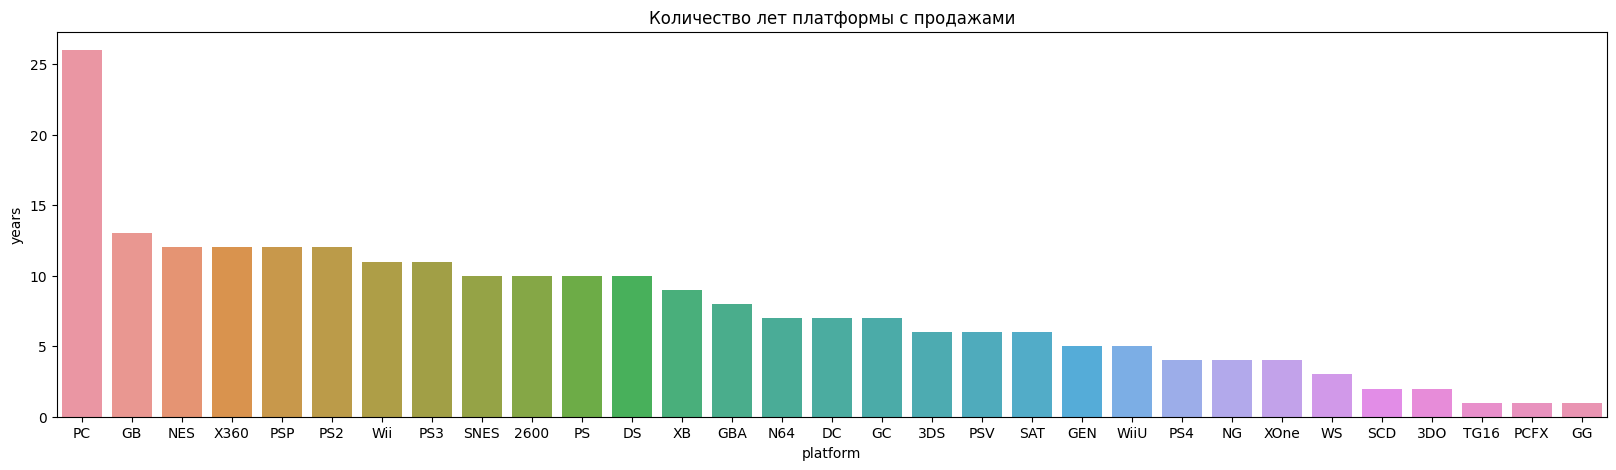

In [347]:
plt.figure(figsize=(20,5))
sns.barplot(data=df_platform_years_sales_count, x='platform', y='count_year_with_sales')
plt.ylabel('years')
plt.xlabel('platform')
plt.title('Количество лет платформы с продажами');

Мы видим, что в среднем продажи на платформе осуществляются в течение 7.6 лет. Самая исторически универсальная платформа - PC, продажи на которой осуществлялись в течение 26 лет

Найдём платформы с самыми большими продажами

In [348]:
df_sales_by_platform = df.groupby('platform')[
    ['total_sales']].agg(['count', 'sum', 'mean']).reset_index()
df_sales_by_platform.columns = ['platform',
                                'total_sales_count',
                                'total_sales_sum',
                                'total_sales_mean']
df_sales_by_platform = df_sales_by_platform.sort_values(by='total_sales_sum',
                                                        ascending=False)
df_sales_by_platform.head()

,platform,total_sales_count,total_sales_sum,total_sales_mean
16,PS2,2134,1247.28,0.584480
28,X360,1234,961.30,0.779011
17,PS3,1305,931.33,0.713663
26,Wii,1286,891.18,0.692986
4,DS,2121,802.77,0.378487


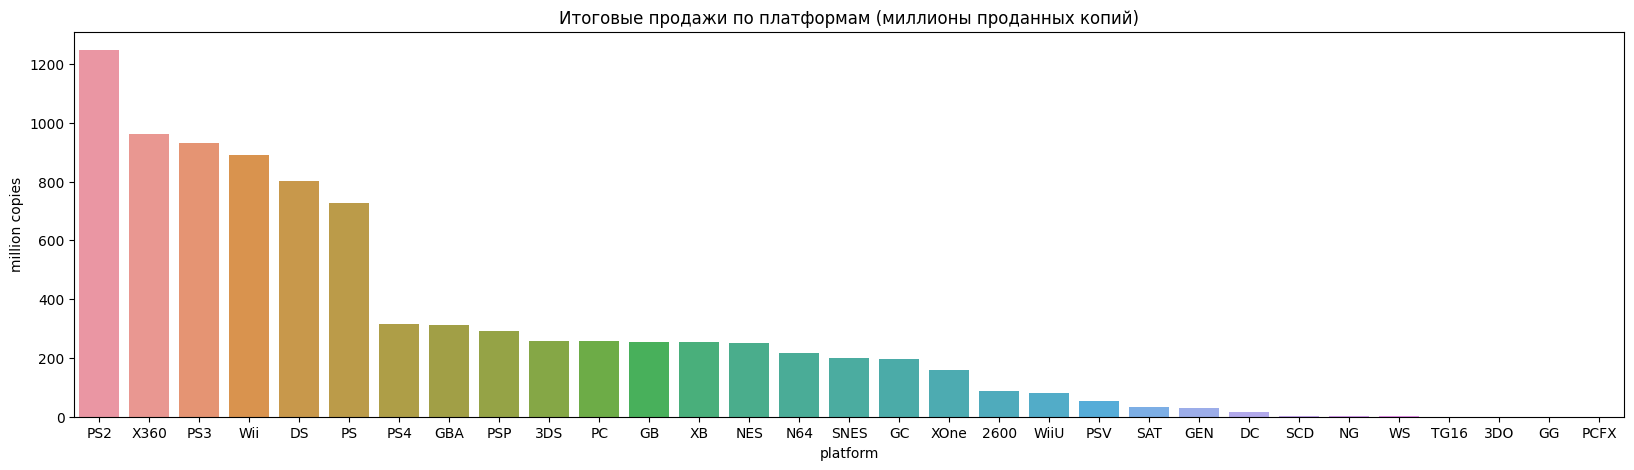

In [349]:
plt.figure(figsize=(20,5))
sns.barplot(data=df_sales_by_platform, x='platform', y='total_sales_sum')
plt.ylabel('million copies')
plt.xlabel('platform')
plt.title('Итоговые продажи по платформам (миллионы проданных копий)');

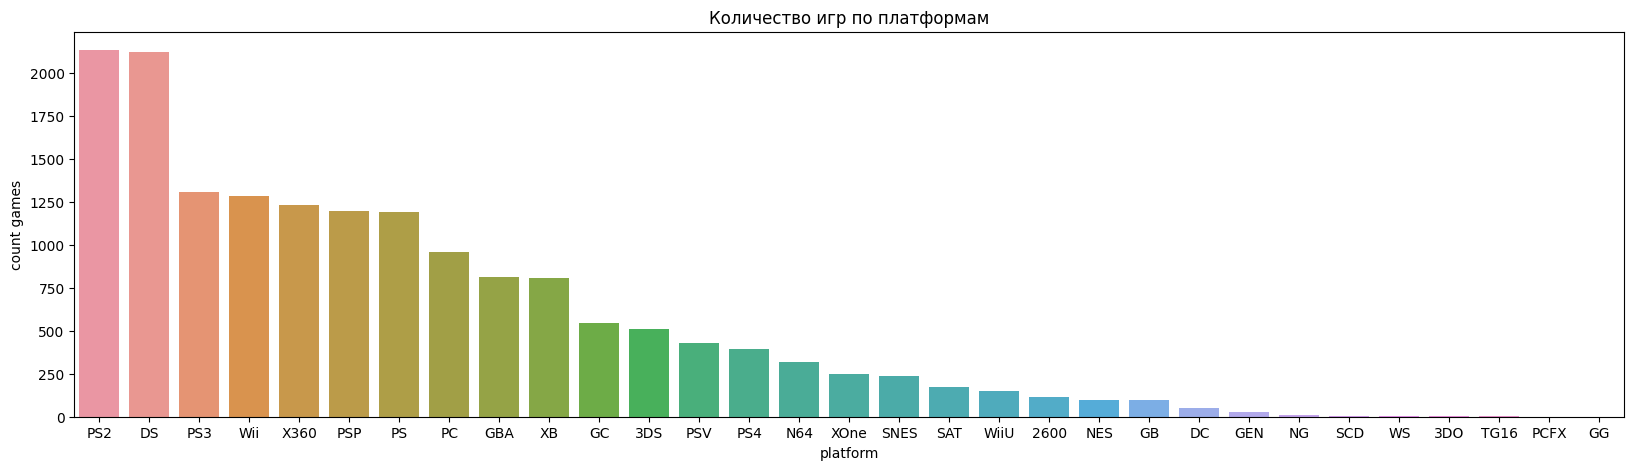

In [350]:
plt.figure(figsize=(20,5))
sns.barplot(data=(
    df.groupby('platform')[['name']]
    .count()
    .reset_index()
    .sort_values(by='name', ascending=False)
), x='platform', y='name')
plt.ylabel('count games')
plt.xlabel('platform')
plt.title('Количество игр по платформам');

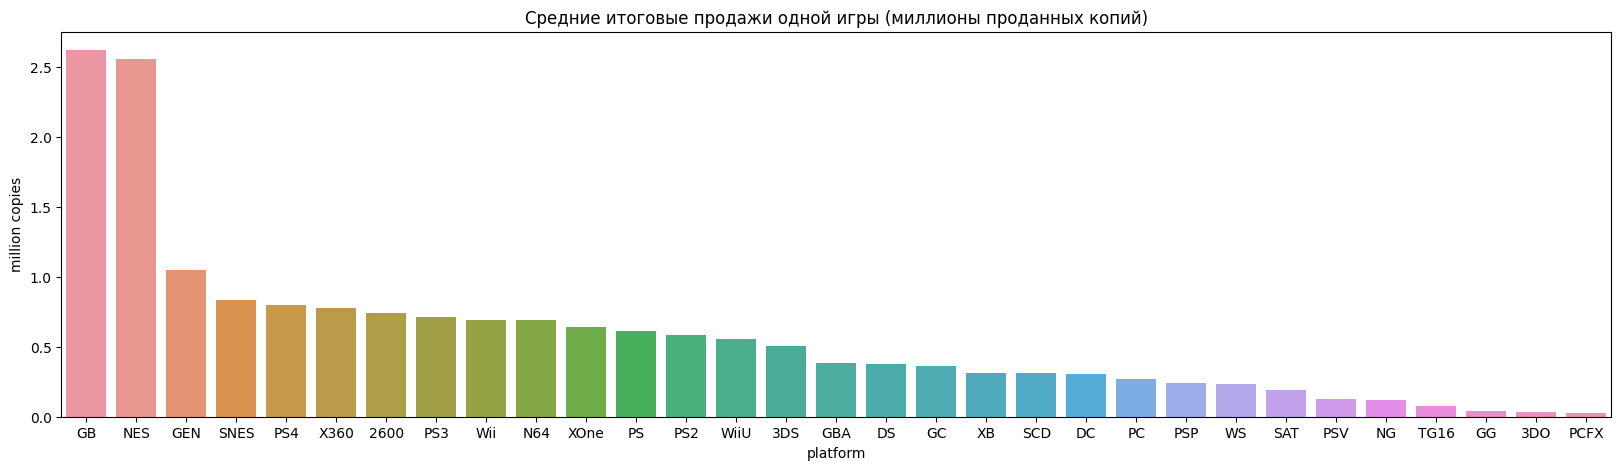

In [351]:
df_sales_by_platform = df_sales_by_platform.sort_values(by='total_sales_mean',
                                                        ascending=False)
plt.figure(figsize=(20,5))
sns.barplot(data=df_sales_by_platform, x='platform', y='total_sales_mean')
plt.ylabel('million copies')
plt.xlabel('platform')
plt.title('Средние итоговые продажи одной игры (миллионы проданных копий)');

In [352]:
df_sales_by_platform = df_sales_by_platform.sort_values(by='total_sales_sum',
                                                        ascending=False)
list(df_sales_by_platform['platform'].head(10))

['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'PS4', 'GBA', 'PSP', '3DS']

<Axes: xlabel='platform', ylabel='year_of_release'>

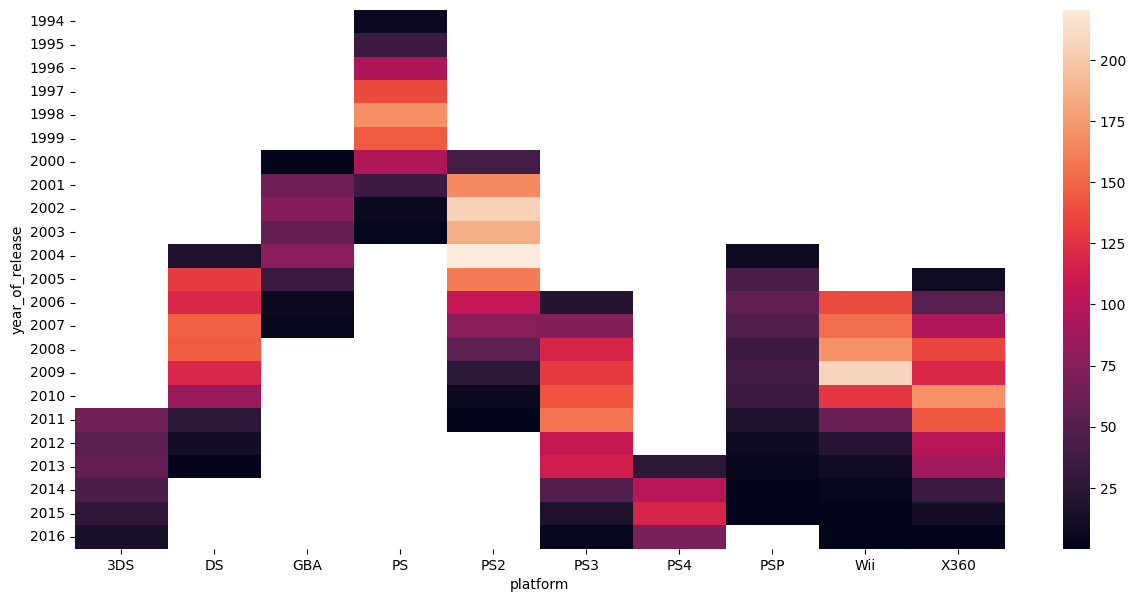

In [353]:
plt.figure(figsize=(15,7))
sns.heatmap((
    df[((df['platform']=='PS2') |
    (df['platform']=='X360') |
    (df['platform']=='PS3') |
    (df['platform']=='Wii') |
    (df['platform']=='DS') |
    (df['platform']=='PS') |
    (df['platform']=='PS4') |
    (df['platform']=='GBA') |
    (df['platform']=='PSP') |
    (df['platform']=='3DS'))]
).pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum'))

<Axes: xlabel='platform', ylabel='year_of_release'>

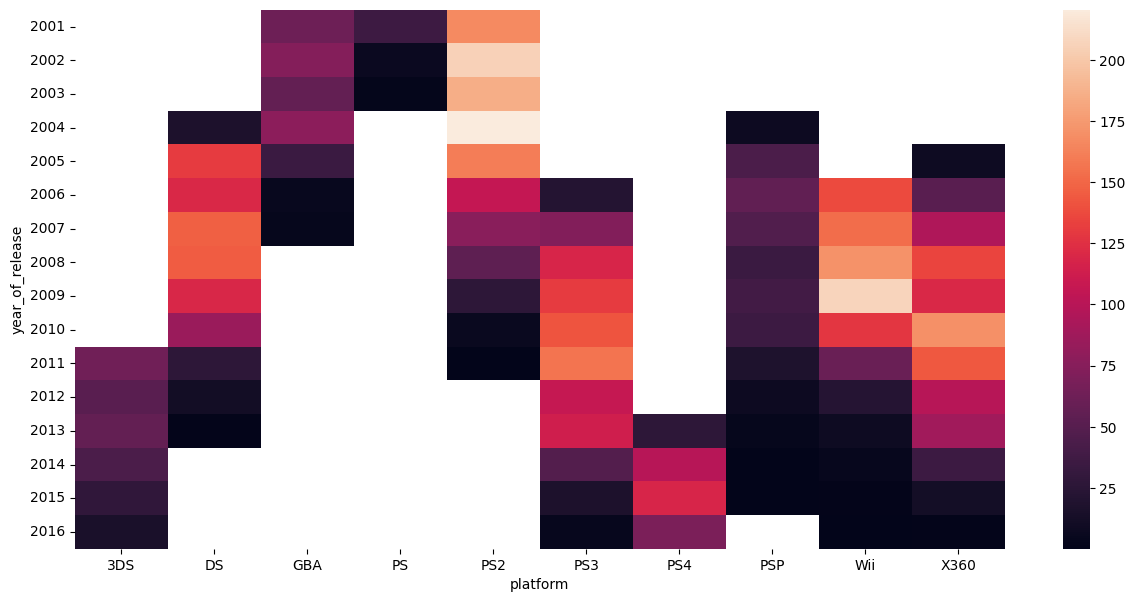

In [354]:
plt.figure(figsize=(15,7))
sns.heatmap((
    df[((df['platform']=='PS2') |
    (df['platform']=='X360') |
    (df['platform']=='PS3') |
    (df['platform']=='Wii') |
    (df['platform']=='DS') |
    (df['platform']=='PS') |
    (df['platform']=='PS4') |
    (df['platform']=='GBA') |
    (df['platform']=='PSP') |
    (df['platform']=='3DS')) &
    (df['year_of_release'] > 2000)]
).pivot_table(index='year_of_release',
              columns='platform',
              values='total_sales',
              aggfunc='sum'))

Мы видим, лучшие продажи в целом без разбивки по платформам были в период с 2006 по 2010 год. В целом по играм и в разбивке по платформам мы можем наблюдать отрицательную динамику общего снижения продаж.

Наблюдения в разбивке по платформам:

- Wii - пик 2009, после которого идет снижение продаж
- X360 - пик 2010, после которого идет снижение продаж
- График чётко демонстрирует смену поколений платформ PS (PS -> PS2 -> PS3 -> PS4)
- Лучшие продажи платформы PS были у второго поколения (PS2) с 2001 по 2005 гг., пик в 2004 году
- 2004 год - год с максимальными продажи на одной платформе (PS2) за всё время
- Платформа DS не имеет новых релизов игр с 2013 года, PSP с 2015 года

Лучшую динамику за период с 2013 года показывает PS4, хотя и тут мы можем наблюдать снижение в 2016 после 2015 года (возможно, это связано с тем, что данные за 2016 год могут быть не полными). Также потенциально прибыльными платформами можно назвать 3DS и XOne.

В целом можно сделать вывод, что рынок игровой индустрии стремительно развивающийся. +- каждае 5 лет происходят резкие изменения. Некоторые платформы совсем исчезают. То, что было актуально 5–10 лет назад, сейчас уже не интересует потребителя.


In [355]:
df_sales_by_platform = df.groupby('year_of_release')[
    ['total_sales']].sum().sort_values(by='total_sales',
                                       ascending=False).reset_index()
df_sales_by_platform.head()

,year_of_release,total_sales
0,2008,671.52
1,2009,659.62
2,2007,604.76
3,2010,590.13
4,2006,520.75


Посмотрим на динамику по регионам

In [356]:
dynamics_by_region = df[['na_sales', 'eu_sales', 'jp_sales',
                         'other_sales', 'total_sales', 'year_of_release']] \
    .groupby('year_of_release').sum()
dynamics_by_region.head()

,na_sales,eu_sales,jp_sales,other_sales,total_sales
year_of_release,,,,,
1980,10.59,0.67,0.00,0.12,11.38
1981,33.40,1.96,0.00,0.32,35.68
1982,26.92,1.65,0.00,0.31,28.88
1983,7.76,0.80,8.10,0.14,16.80
1984,33.28,2.10,14.27,0.70,50.35


Text(0, 0.5, 'sales')

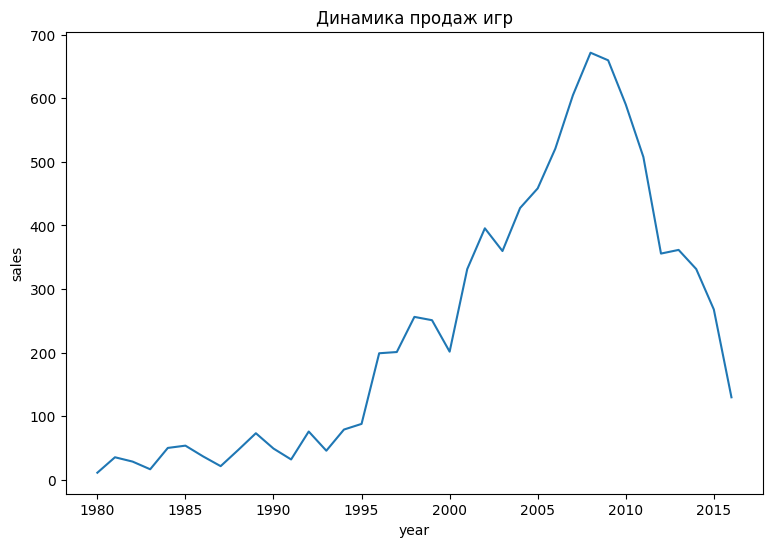

In [357]:
plt.plot(dynamics_by_region.index, dynamics_by_region['total_sales'])
plt.title('Динамика продаж игр')
plt.xlabel('year')
plt.ylabel('sales')

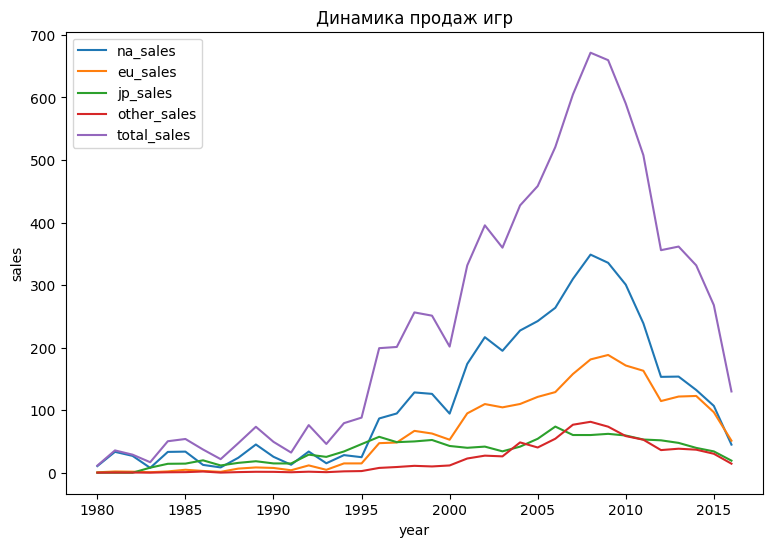

In [358]:
#используем цикл, чтобы построить графики для каждого региона
for region in dynamics_by_region.columns:
    plt.plot(dynamics_by_region.index, dynamics_by_region[region])

plt.title('Динамика продаж игр')
plt.xlabel('year')
plt.ylabel('sales')
plt.legend(dynamics_by_region)

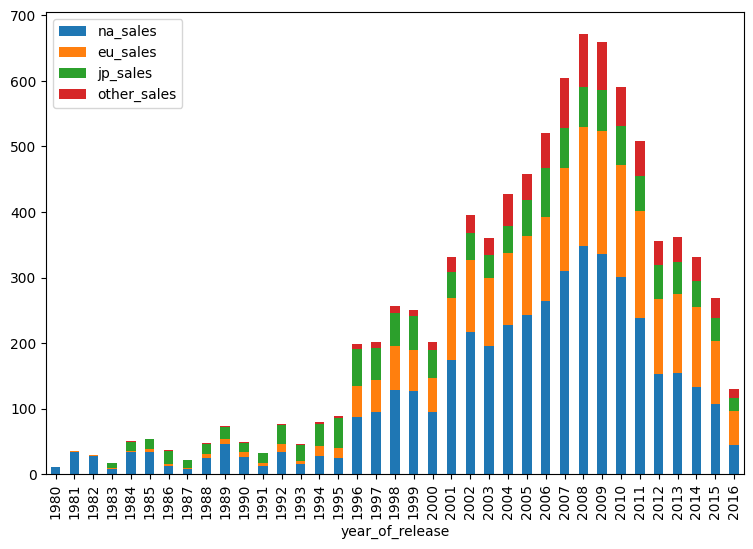

In [359]:
dynamics_by_region.drop('total_sales', axis=1).plot(kind='bar', stacked=True);

Далее для работы с данными в целях прогнозирования продаж на 2017 год определимся с актуальным периодом. С учётом динамично меняющейся индустрии оставим интервал в 3 года: 2014, 2015 и неполный 2016.

In [360]:
print(df.shape[0])
df_2014 = df[df['year_of_release'] >= 2014]
print(df_2014.shape[0])

16459
1689


Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам

In [361]:
data = []

for platform in df_2014.platform.unique():
    data.append(
        go.Box(y=df_2014[df_2014.platform==platform].total_sales,
               name=platform)
    )
iplot(data, show_link=False)

Из-за крупных выбросов все боксплоты концентрируются в максимально низких значениях. Ограничим масштаб графика

(0.0, 0.85)

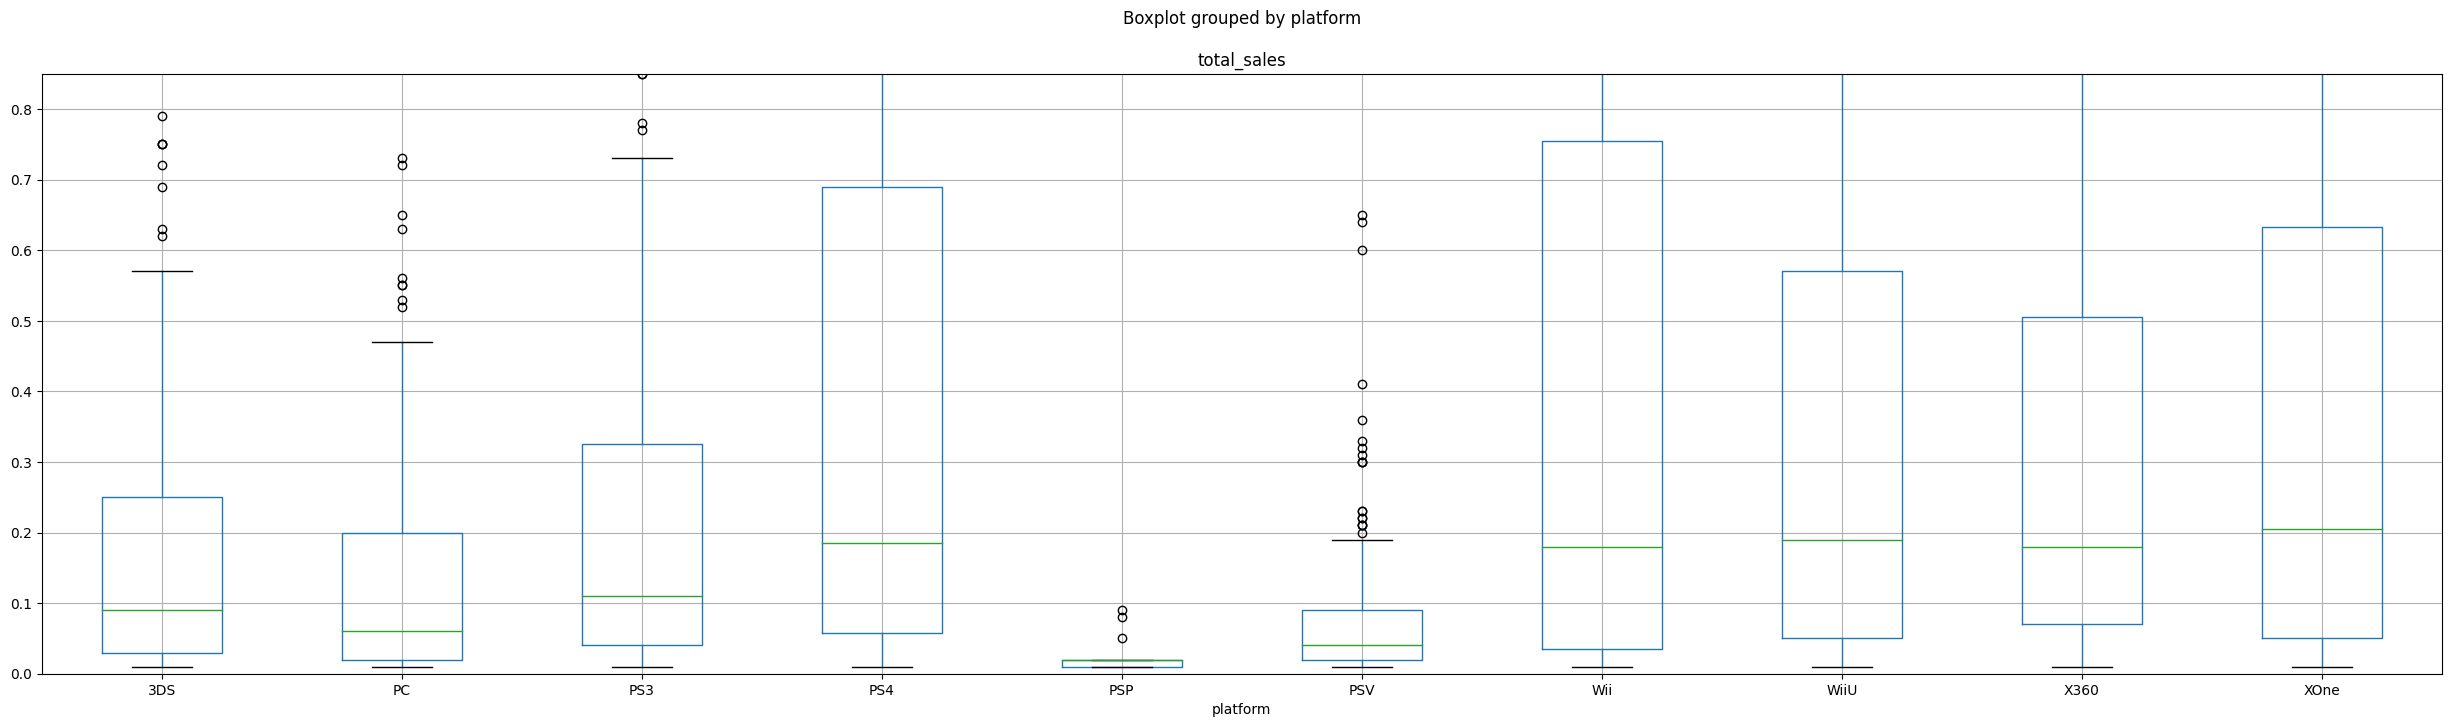

In [362]:
df_2014.boxplot(column='total_sales', by='platform', figsize=(30,8))
plt.ylim(0, 0.85)

График показывает нам, что большинство игр на платформах имеют продажи до 0.5 млн проданных копий (либо немного превышают это значение).

Посмотрим на количество игр на платформах

Text(0.5, 1.0, 'Количество игр по платформам')

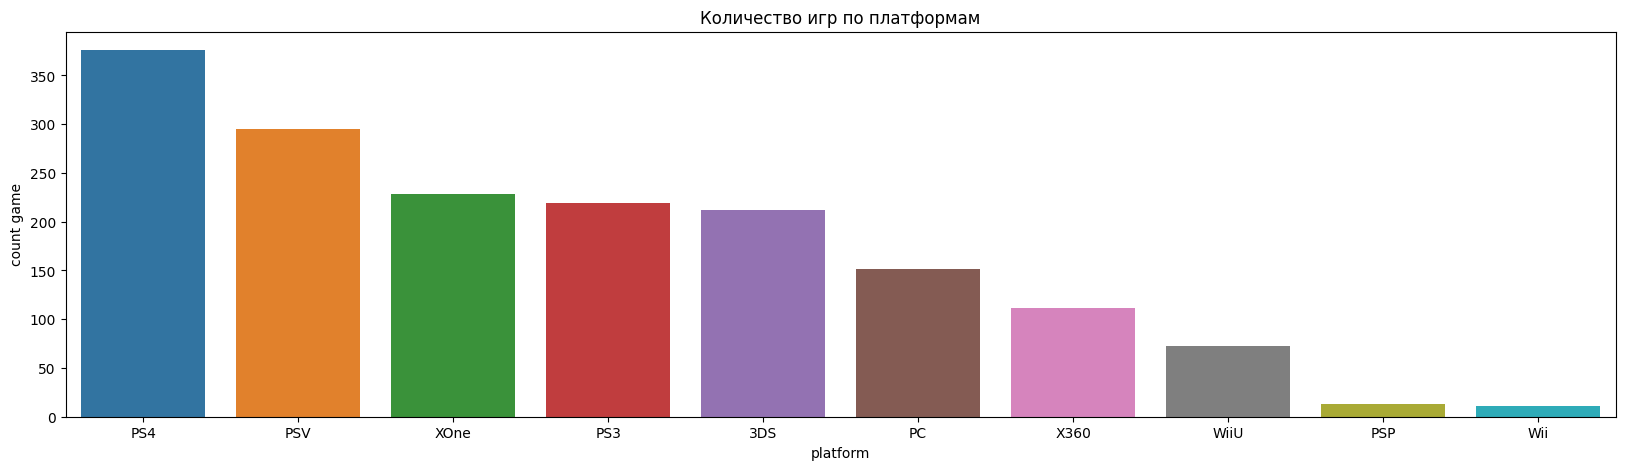

In [363]:
plt.figure(figsize=(20,5))
df_count_by_platform_2014 = df_2014.groupby('platform')[
    ['total_sales']].count().reset_index().sort_values(by='total_sales',
                                                       ascending=False)
sns.barplot(data=df_count_by_platform_2014, x='platform', y='total_sales')
plt.ylabel('count game')
plt.xlabel('platform')
plt.title('Количество игр по платформам')

Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами

<Axes: title={'center': 'Корреляция между продажами и оценками критиков'}, xlabel='critic_score', ylabel='total_sales'>

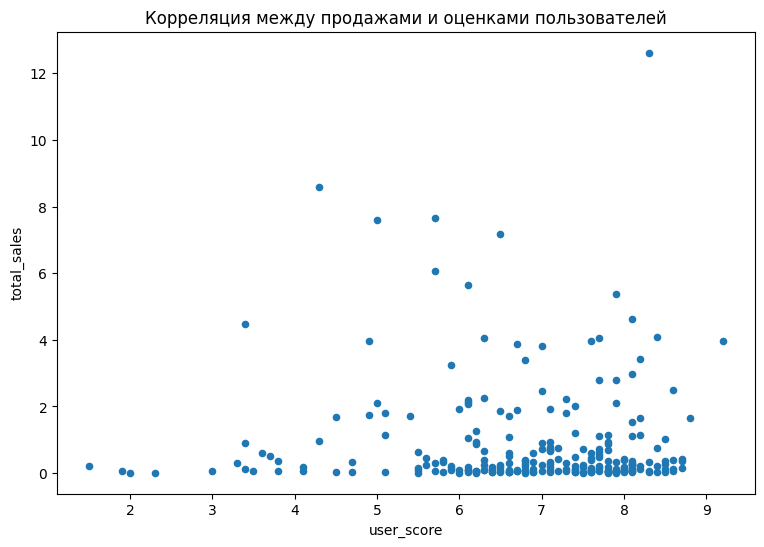

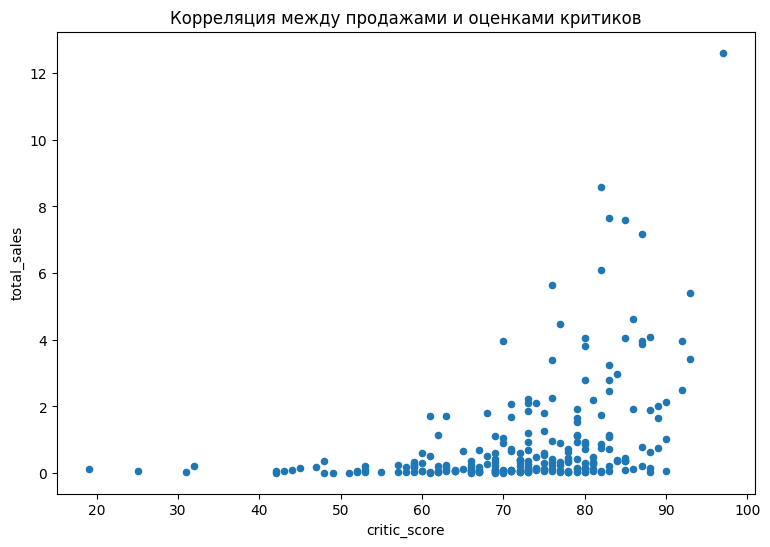

In [364]:
# посмотрим на взаимосвязь оценок и продаж
df_2014[df_2014['platform']=='PS4'].plot(kind='scatter',
        x='user_score',
        y='total_sales',
        title='Корреляция между продажами и оценками пользователей')

df_2014[df_2014['platform']=='PS4'].plot(kind='scatter',
        x='critic_score',
        y='total_sales',
        title='Корреляция между продажами и оценками критиков')

In [365]:
df_2014[df_2014['platform']=='PS4']['critic_score'].corr(df_2014[df_2014['platform']=='PS4']['total_sales'])

0.40266141068104083

In [366]:
df_2014[df_2014['platform']=='PS4']['user_score'].corr(df_2014[df_2014['platform']=='PS4']['total_sales'])

-0.040131589472697356

Мы видим, что на платформе PS4 взаимосвязь между продажами и оценками критиков сильнее, чем между продажами и оценками пользователей

Построим графики и найдем корреляцию на всех платформах

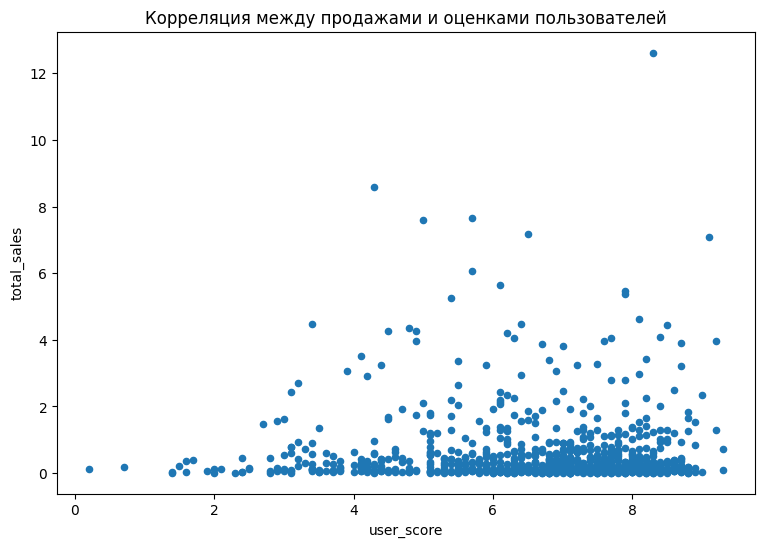

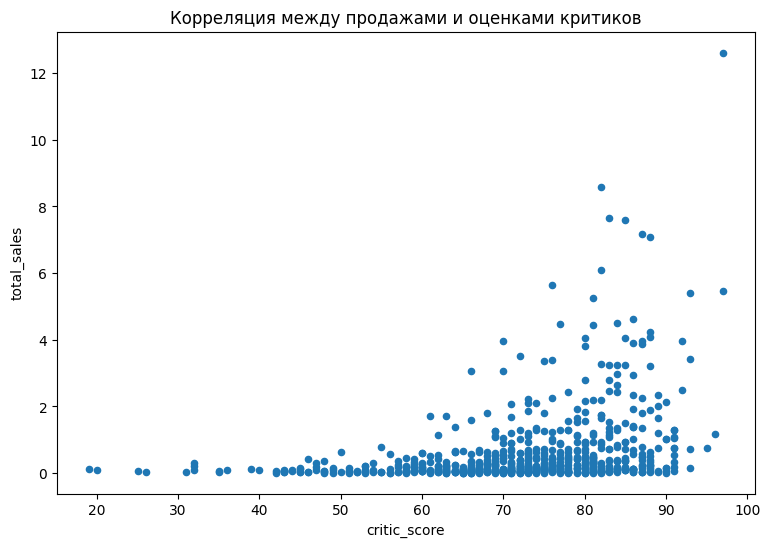

In [367]:
# посмотрим на взаимосвязь оценок и продаж
df_2014.plot(kind='scatter',
        x='user_score',
        y='total_sales',
        title='Корреляция между продажами и оценками пользователей')

df_2014.plot(kind='scatter',
        x='critic_score',
        y='total_sales',
        title='Корреляция между продажами и оценками критиков');

In [368]:
df_2014['critic_score'].corr(df_2014['total_sales'])

0.328105086966363

In [369]:
df_2014['user_score'].corr(df_2014['total_sales'])

-0.013070305002484562

- Корреляция между оценками критиков и пользователей и итоговыми продажами выше на популярной платформе, чем в целом общая по платформам
- Оценки критиков демонстрируют прямую, средне-слабую корреляцию с "цифрами" продаж. Оценки пользователей корреляции с продажами не имеют

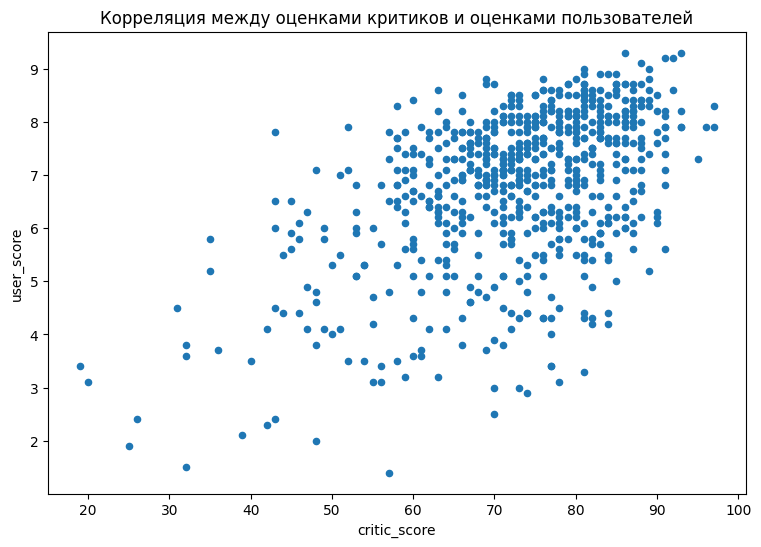

In [370]:
df_2014.plot(kind='scatter',
        x='critic_score',
        y='user_score',
        title='Корреляция между оценками критиков и оценками пользователей');

In [371]:
df_2014['user_score'].corr(df_2014['critic_score'])

0.5044604031800752

Существует средней степени (0.5) корреляция между оценками критиков и оценками пользователей

Проверим, игры какого рейтинга самые рентабельные

In [372]:
df_rating_by_sales = df_2014.groupby('rating')[
    ['total_sales']].agg(['count', 'sum', 'mean']).reset_index()
df_rating_by_sales.columns = ['rating',
                              'total_sales_count',
                              'total_sales_sum',
                              'total_sales_mean']
df_rating_by_sales = df_rating_by_sales.sort_values(by='total_sales_sum',
                                                    ascending=False)
df_rating_by_sales

,rating,total_sales_count,total_sales_sum,total_sales_mean
2,M,265,226.54,0.854868
4,no info,749,198.97,0.265648
0,E,219,133.13,0.607900
3,T,271,99.13,0.365793
1,E10+,185,71.68,0.387459


Наиболее рентабельны игры рейтинга М

In [373]:
df_2014['critic_score_cut'] = pd.qcut(df_2014['critic_score'], q=5, precision=0)
df_2014['critic_score_cut'].value_counts()

(18.0, 64.0]    156
(71.0, 77.0]    155
(83.0, 97.0]    144
(64.0, 71.0]    142
(77.0, 83.0]    121
Name: critic_score_cut, dtype: int64

In [374]:
df_2014.groupby('critic_score_cut')[['total_sales']].sum()

,total_sales
critic_score_cut,
"(18.0, 64.0]",27.78
"(64.0, 71.0]",50.02
"(71.0, 77.0]",76.64
"(77.0, 83.0]",97.47
"(83.0, 97.0]",194.79


In [375]:
df_2014['user_score_cut'] = pd.qcut(df_2014['user_score'], q=5, precision=0)
df_2014['user_score_cut'].value_counts()

(7.3, 8.0]    190
(6.6, 7.3]    185
(5.4, 6.6]    181
(0.1, 5.4]    179
(8.0, 9.3]    153
Name: user_score_cut, dtype: int64

In [376]:
df_2014.groupby('user_score_cut')[['total_sales']].sum()

,total_sales
user_score_cut,
"(0.1, 5.4]",124.53
"(5.4, 6.6]",125.93
"(6.6, 7.3]",79.80
"(7.3, 8.0]",85.88
"(8.0, 9.3]",107.97


Категоризация оценок критиков и пользователей также показывает, что линейная связь между оценками критиков и итоговыми продажами выражена сильнее

Найдем самые прибыльные игры за всё время

In [377]:
df.sort_values(by='total_sales', ascending=False).head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,no info,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,no info,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,no info,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,no info,28.31


Также найдем самые прибыльные игры с 2014 по 2016 год

In [378]:
df_2014.sort_values(by='total_sales', ascending=False).head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,critic_score_cut,user_score_cut
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,no info,14.63,NaN,NaN
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62,"(83.0, 97.0]","(8.0, 9.3]"
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,no info,11.68,NaN,NaN
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58,"(77.0, 83.0]","(0.1, 5.4]"
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,no info,7.98,NaN,NaN
92,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,7.66,"(83.0, 97.0]","(5.4, 6.6]"
94,FIFA 17,PS4,2016,Sports,0.66,5.75,0.08,1.11,85.0,5.0,E,7.60,"(83.0, 97.0]","(0.1, 5.4]"
96,Super Smash Bros. for Wii U and 3DS,3DS,2014,Fighting,3.27,1.37,2.43,0.48,NaN,NaN,no info,7.55,NaN,NaN
99,Call of Duty: Black Ops 3,XOne,2015,Shooter,4.59,2.11,0.01,0.68,NaN,NaN,no info,7.39,NaN,NaN
105,Fallout 4,PS4,2015,Role-Playing,2.53,3.27,0.24,1.13,87.0,6.5,M,7.17,"(83.0, 97.0]","(5.4, 6.6]"


Мы видим, что за последние 3 года наибольшие продажи приносят игры на PS4

Посмотрим на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

В основу рейтинга жанров по прибыли заложим показатель медианы. Показатель итоговой суммы не будет учитывать количество игр и за высокими показателями общих продаж может скрываться множество мелких игр с низкими продажами. Или 2-3 бестселлера и множество провалов. Нам же лучше найти жанр, где игры стабильно приносят высокий доход - для этого рассмотрим медианные продажи

In [379]:
top_platforms = df_2014['platform'].value_counts().sort_values(ascending=False).head(10).index.values

platform_genre_sales = df_2014[df_2014['platform'].isin(top_platforms)].pivot_table(
                        index='platform',
                        columns='genre',
                        values='total_sales',
                        aggfunc='median').fillna(0)

platform_genre_sales

genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
platform,,,,,,,,,,,,
3DS,0.070,0.06,0.12,0.080,0.180,0.07,0.000,0.200,0.000,0.110,0.140,0.050
PC,0.050,0.04,0.05,0.020,0.060,0.00,0.030,0.090,0.230,0.105,0.050,0.050
PS3,0.100,0.05,0.13,0.075,0.110,0.04,0.080,0.105,0.425,0.195,0.140,0.060
PS4,0.150,0.07,0.16,0.060,0.260,0.02,0.205,0.200,0.820,0.210,0.405,0.080
PSP,0.020,0.01,0.00,0.010,0.000,0.00,0.000,0.000,0.000,0.000,0.090,0.000
PSV,0.040,0.02,0.09,0.060,0.020,0.03,0.040,0.060,0.640,0.010,0.055,0.035
Wii,0.035,0.18,0.00,0.950,0.000,0.00,0.000,0.000,0.000,0.000,0.560,0.000
WiiU,0.130,0.07,2.94,0.110,0.510,0.02,7.090,0.335,0.370,0.000,0.410,0.000
X360,0.160,0.10,0.08,0.230,0.095,0.00,0.130,0.490,0.380,0.205,0.280,0.000


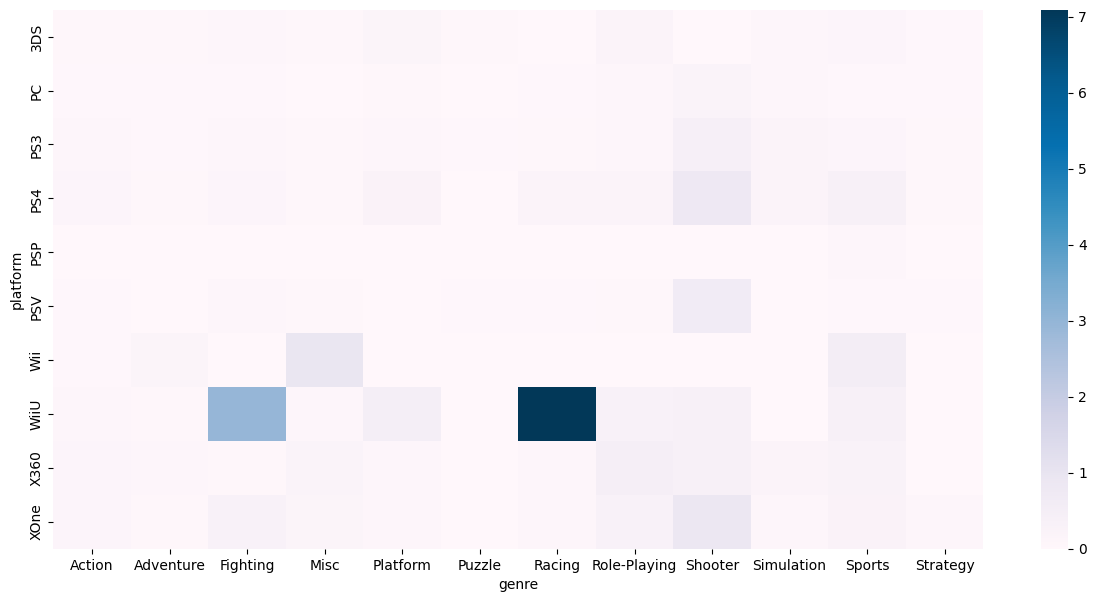

In [380]:
plt.figure(figsize=(15,7))
sns.heatmap(platform_genre_sales, cmap='PuBu');

In [381]:
platform_genre_count = df_2014[df_2014['platform'].isin(top_platforms)].pivot_table(
                        index='platform',
                        columns='genre',
                        values='total_sales',
                        aggfunc='count').fillna(0)

platform_genre_count

genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
platform,,,,,,,,,,,,
3DS,87.0,21.0,5.0,20.0,8.0,7.0,0.0,41.0,0.0,10.0,5.0,8.0
PC,39.0,8.0,2.0,3.0,1.0,0.0,13.0,18.0,21.0,18.0,11.0,17.0
PS3,77.0,21.0,17.0,14.0,3.0,1.0,8.0,28.0,14.0,2.0,33.0,1.0
PS4,142.0,28.0,17.0,19.0,9.0,1.0,18.0,51.0,38.0,6.0,42.0,5.0
PSP,6.0,4.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
PSV,111.0,74.0,7.0,17.0,4.0,2.0,3.0,59.0,1.0,3.0,10.0,4.0
Wii,6.0,1.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
WiiU,35.0,3.0,2.0,13.0,7.0,3.0,1.0,4.0,3.0,0.0,2.0,0.0
X360,35.0,11.0,5.0,5.0,2.0,0.0,8.0,6.0,15.0,2.0,22.0,0.0


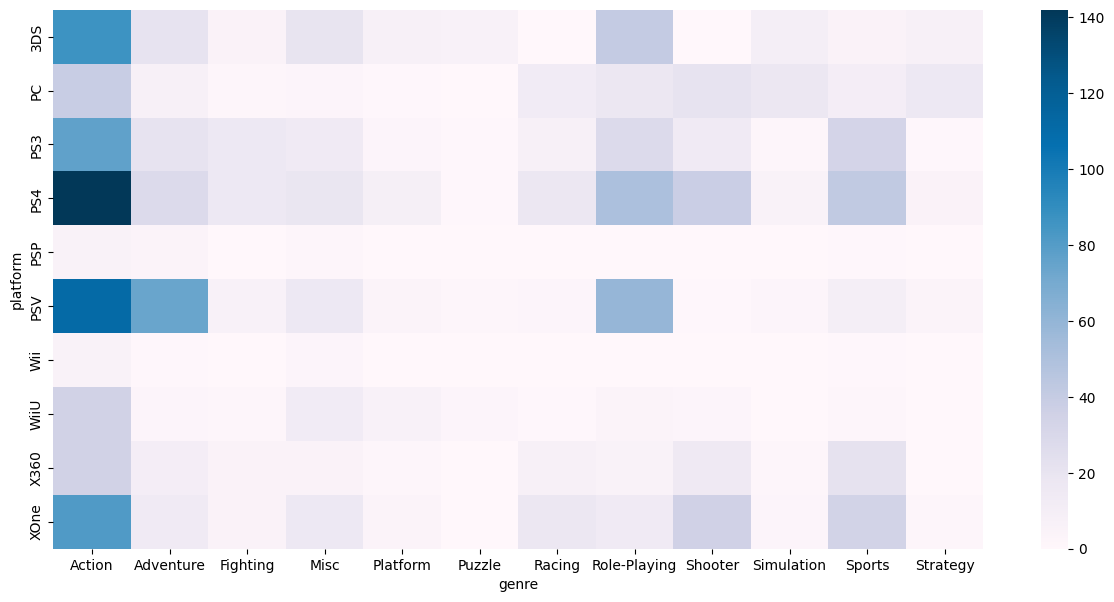

In [382]:
plt.figure(figsize=(15,7))
sns.heatmap(platform_genre_count, cmap='PuBu');

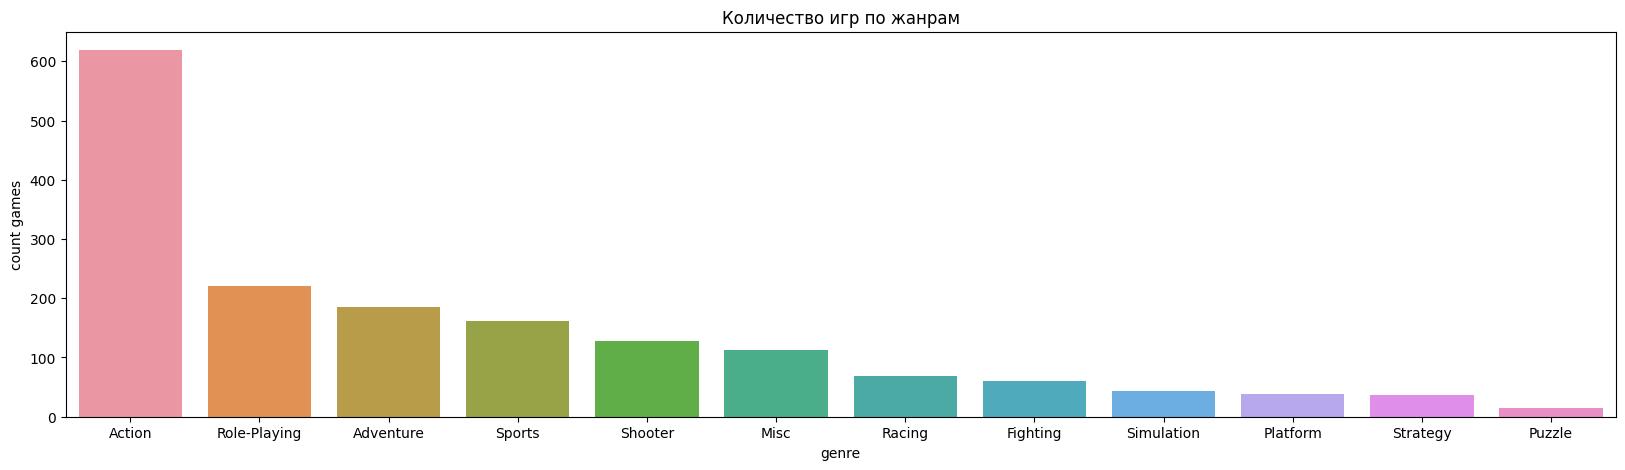

In [383]:
plt.figure(figsize=(20,5))
df_genre_count_games = df_2014.groupby('genre')[
    ['total_sales']].count().reset_index().sort_values(by='total_sales',
                                                       ascending=False)
sns.barplot(data=df_genre_count_games, x='genre', y='total_sales')
plt.ylabel('count games')
plt.xlabel('genre')
plt.title('Количество игр по жанрам');

In [384]:
df_genre_count_games['percent'] = round(df_genre_count_games['total_sales'] /
                                        df_genre_count_games['total_sales'].sum() * 100, 1)
df_genre_count_games.head()

,genre,total_sales,percent
0,Action,619,36.6
7,Role-Playing,221,13.1
1,Adventure,185,11.0
10,Sports,161,9.5
8,Shooter,128,7.6


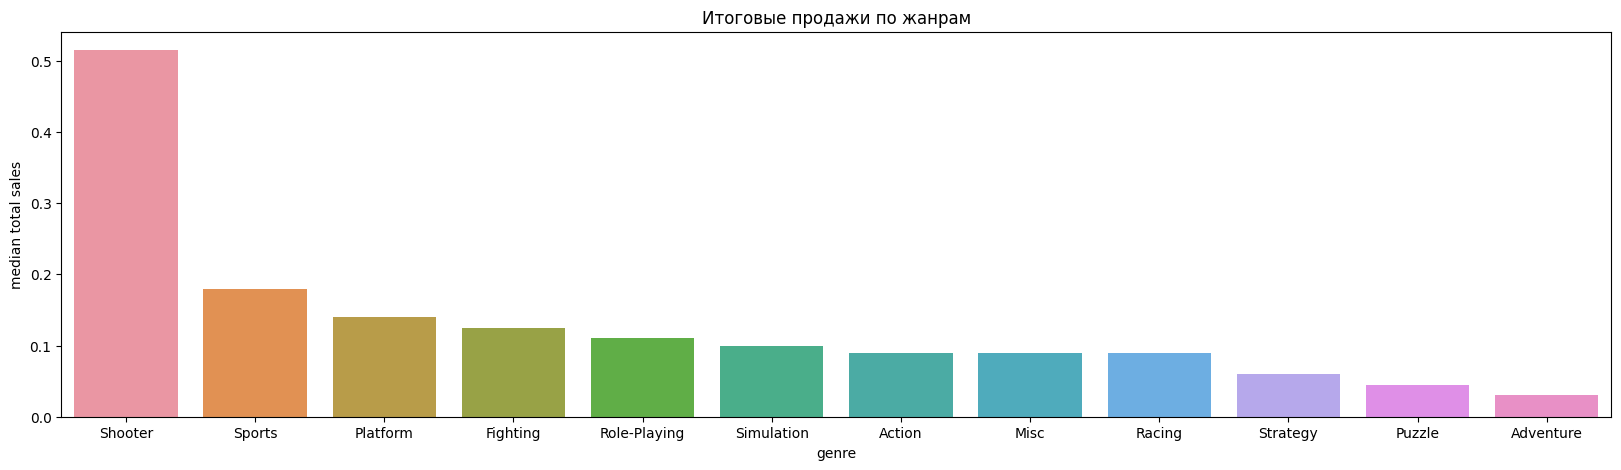

In [385]:
plt.figure(figsize=(20,5))
df_genre_total_sales = df_2014.groupby('genre')[
    ['total_sales']].median().reset_index().sort_values(by='total_sales',
                                                        ascending=False)
sns.barplot(data=df_genre_total_sales, x='genre', y='total_sales')
plt.ylabel('median total sales')
plt.xlabel('genre')
plt.title('Итоговые продажи по жанрам');

Мы видим, что совокупно по платформам больше всего игр в жанре Action - более 36%. При этом самые прибыльные игры в жанре Shooter (из расчёта на одну игру)

# Портрет пользователя каждого региона

Определим для пользователя каждого региона (NA, EU, JP):
- Самые популярные платформы (топ-5)
- Самые популярные жанры (топ-5) (разница)
- Влияет ли рейтинг ESRB на продажи в отдельном регионе?

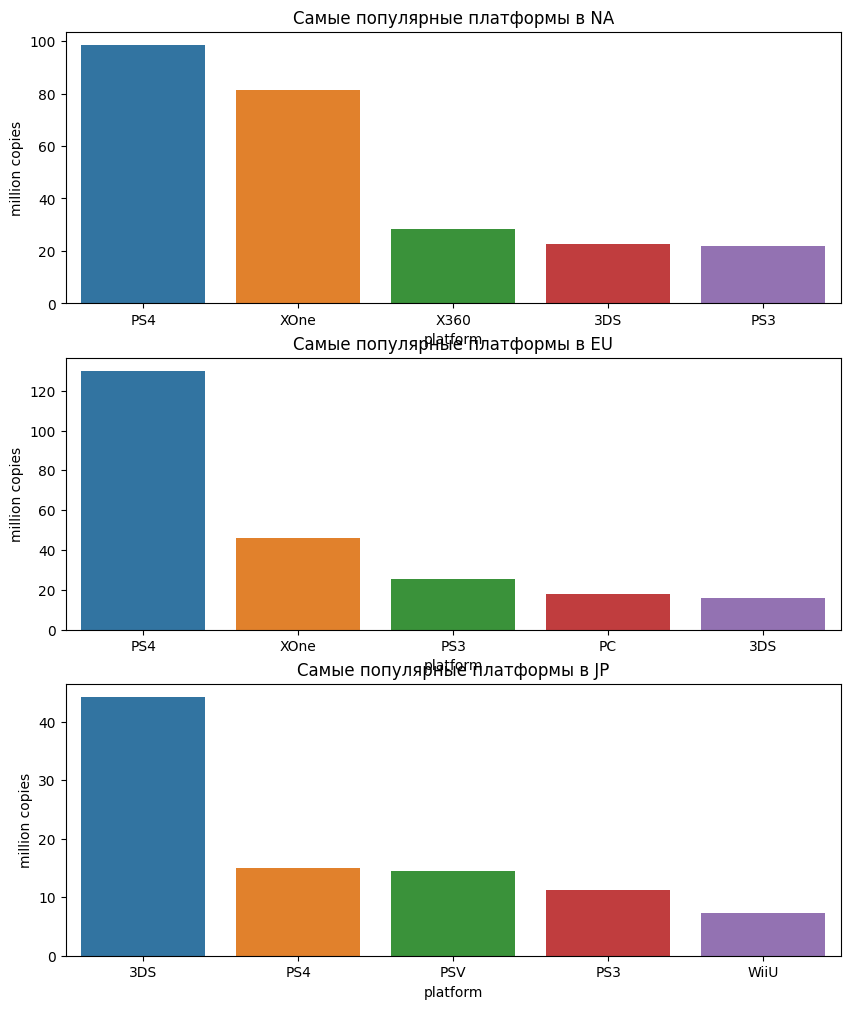

In [386]:
df_platform_by_region = (
    df_2014.groupby('platform')[['na_sales', 'eu_sales', 'jp_sales']]
    .agg(['count', 'sum']).reset_index()
)
df_platform_by_region.columns = (
    ['platform', 'count', 'na_sales_sum', 'eu_sales_count',
     'eu_sales_sum', 'jp_sales_count', 'jp_sales_sum']
     )
df_platform_by_region = df_platform_by_region.drop(['eu_sales_count',
                                                    'jp_sales_count'], axis=1)

plt.figure(figsize=(10, 12))

pylab.subplot(3, 1, 1)
df_platform_by_region_na = df_platform_by_region.sort_values(by='na_sales_sum',
                                                             ascending=False).head()
sns.barplot(data=df_platform_by_region_na, x='platform', y='na_sales_sum')
plt.ylabel('million copies')
plt.title('Самые популярные платформы в NA')

pylab.subplot(3, 1, 2)
df_platform_by_region_eu = df_platform_by_region.sort_values(by='eu_sales_sum',
                                                             ascending=False).head()
sns.barplot(data=df_platform_by_region_eu, x='platform', y='eu_sales_sum')
plt.ylabel('million copies')
plt.title('Самые популярные платформы в EU')

pylab.subplot(3, 1, 3)
df_platform_by_region_jp = df_platform_by_region.sort_values(by='jp_sales_sum',
                                                             ascending=False).head()
sns.barplot(data=df_platform_by_region_jp, x='platform', y='jp_sales_sum')
plt.ylabel('million copies')
plt.title('Самые популярные платформы в JP');

Мы видим, что предпочтения игр по платформам в Японии сильнее отличаются от Северной Америки и Европы

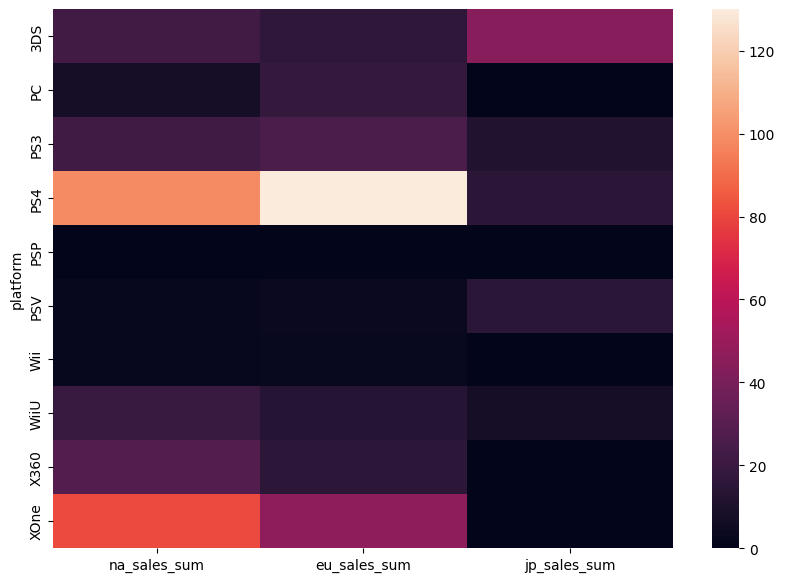

In [387]:
plt.figure(figsize=(10,7))
sns.heatmap(df_platform_by_region.set_index('platform').drop('count', axis=1));

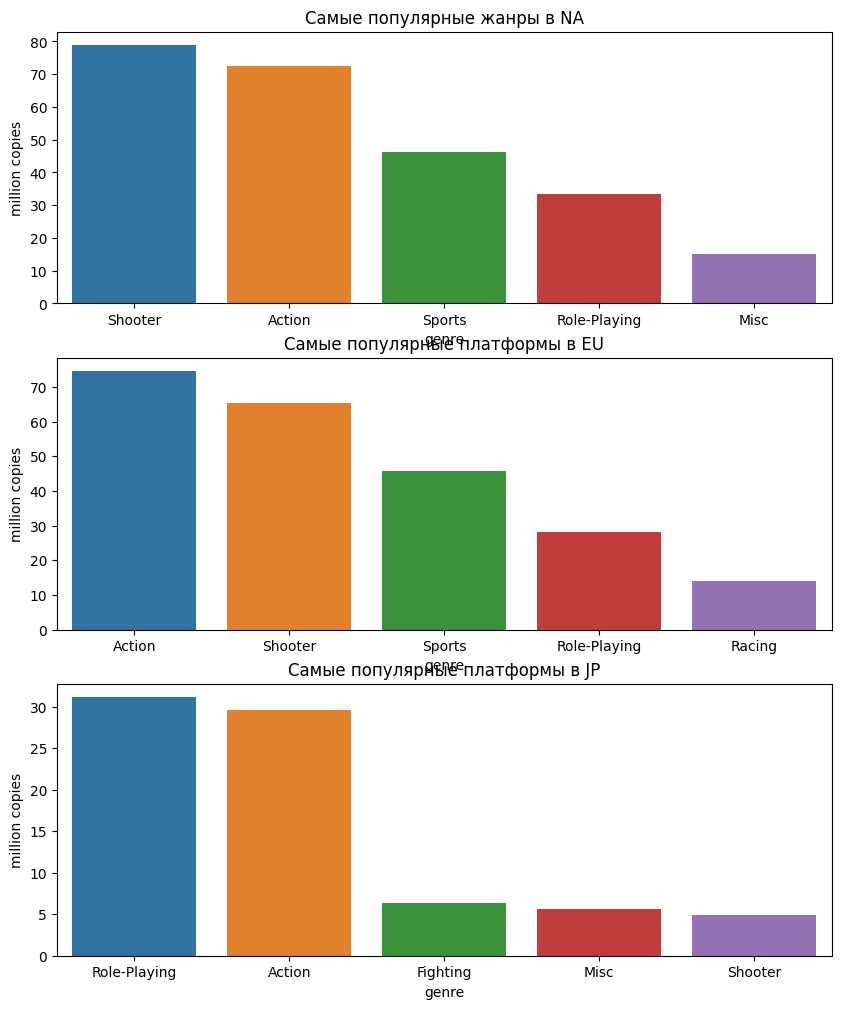

In [388]:
df_genre_by_region = (
    df_2014.groupby('genre')[['na_sales', 'eu_sales', 'jp_sales']]
    .sum().reset_index()
)
df_genre_by_region.sort_values(by='na_sales', ascending=False).head()

plt.figure(figsize=(10, 12))

pylab.subplot(3, 1, 1)
df_genre_by_region_na = df_genre_by_region.sort_values(by='na_sales',
                                                       ascending=False).head()
sns.barplot(data=df_genre_by_region_na, x='genre', y='na_sales')
plt.ylabel('million copies')
plt.title('Самые популярные жанры в NA')

pylab.subplot(3, 1, 2)
df_genre_by_region_eu = df_genre_by_region.sort_values(by='eu_sales',
                                                       ascending=False).head()
sns.barplot(data=df_genre_by_region_eu, x='genre', y='eu_sales')
plt.ylabel('million copies')
plt.title('Самые популярные платформы в EU')

pylab.subplot(3, 1, 3)
df_genre_by_region_jp = df_genre_by_region.sort_values(by='jp_sales',
                                                       ascending=False).head()
sns.barplot(data=df_genre_by_region_jp, x='genre', y='jp_sales')
plt.ylabel('million copies')
plt.title('Самые популярные платформы в JP');

В Японии самый популярный жанр - Role-Playing, его продажи более чем в 2 раза выше следующего за ним жанра по популярности. В то время как в Северной Америке и Европе этот жанр не входит в пятерку самых популярных

In [389]:
df_rating_by_region = df_2014.groupby('rating')[['na_sales', 'eu_sales',
                                                 'jp_sales']].sum().reset_index()
df_rating_by_region.sort_values(by='na_sales', ascending=False).head()

,rating,na_sales,eu_sales,jp_sales
2,M,96.42,93.44,8.01
4,no info,64.72,58.95,56.90
0,E,50.74,58.06,8.94
3,T,38.95,34.07,14.78
1,E10+,33.23,26.16,4.46


In [390]:
df_rating_by_region = df_2014.groupby('rating')[['na_sales', 'eu_sales',
                                                 'jp_sales']].sum().reset_index()
df_rating_by_region.sort_values(by='eu_sales', ascending=False).head()

,rating,na_sales,eu_sales,jp_sales
2,M,96.42,93.44,8.01
4,no info,64.72,58.95,56.90
0,E,50.74,58.06,8.94
3,T,38.95,34.07,14.78
1,E10+,33.23,26.16,4.46


In [391]:
df_rating_by_region = df_2014.groupby('rating')[['na_sales', 'eu_sales',
                                                 'jp_sales']].sum().reset_index()
df_rating_by_region.sort_values(by='jp_sales', ascending=False).head()

,rating,na_sales,eu_sales,jp_sales
4,no info,64.72,58.95,56.90
3,T,38.95,34.07,14.78
0,E,50.74,58.06,8.94
2,M,96.42,93.44,8.01
1,E10+,33.23,26.16,4.46


In [392]:
(
    df_2014.groupby('rating')[['na_sales', 'eu_sales', 'jp_sales']]
           .count()
           .reset_index()
           .sort_values(by='jp_sales', ascending=False).head()
)

,rating,na_sales,eu_sales,jp_sales
4,no info,749,749,749
3,T,271,271,271
2,M,265,265,265
0,E,219,219,219
1,E10+,185,185,185


In [393]:
(
    df_2014.groupby('rating')[['na_sales', 'eu_sales', 'jp_sales']]
           .mean()
           .reset_index()
           .sort_values(by='jp_sales', ascending=False).head()
)

,rating,na_sales,eu_sales,jp_sales
4,no info,0.086409,0.078705,0.075968
3,T,0.143727,0.125720,0.054539
0,E,0.231689,0.265114,0.040822
2,M,0.363849,0.352604,0.030226
1,E10+,0.179622,0.141405,0.024108


В Северной Америке и Европе рейтинги по итоговой сумме продаж совпадают (также схожи средние продажи игр).

В Японии со значительным отрывом лидерами продаж являются игры без рейтинга ESRB. Рейтинг ESRB - это американский рейтинг, а в Японии есть своё рейтинговое агентство (CERO)


# Проверка гипотез

- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

<Axes: >

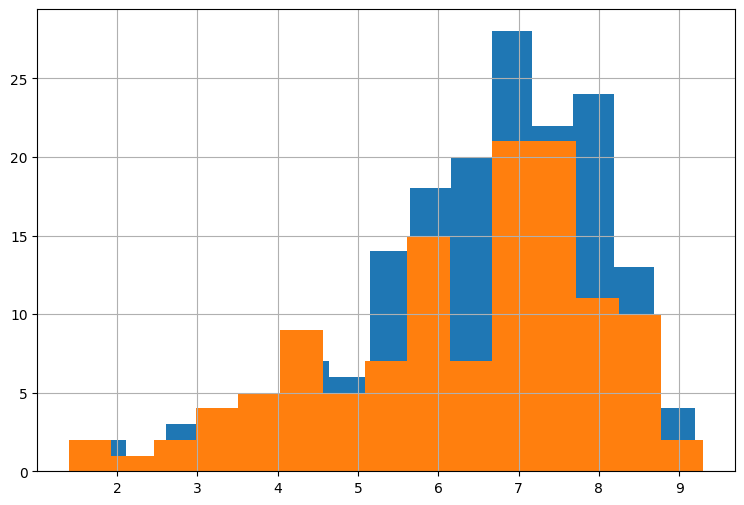

In [394]:
# проверим распределение
df_2014[df_2014['platform']=='XOne']['user_score'].hist(bins=15)
df_2014[df_2014['platform']=='PC']['user_score'].hist(bins=15)

Предположим, что средние двух выборок равны (выборка 1 - пользовательские рейтинги платформы Xbox One, выборка 2 - пользовательские рейтинги платформы PC).

H0 - средние равны

H1 - средние отличаются

Проверим это статистически, используя t-test Стьюдента (за уровень значимости примем 5%):

*Используем t-test Стьюдента, так как нам нужно сравнивать средние двух генеральных совокупностей (выборок) между собой. Так как выборки разного размера, добавим параметр equal_var= False


In [395]:
print(df_2014[df_2014['platform']=='XOne']['user_score'].mean())
print(df_2014[df_2014['platform']=='PC']['user_score'].mean())

6.594545454545454
6.298360655737704


In [396]:
df_pc = df_2014[df_2014['platform']=='PC'][~df_2014[df_2014['platform']==
                                                    'PC']['user_score'].isna()]
df_xone = df_2014[df_2014['platform']=='XOne'][~df_2014[df_2014['platform']==
                                                        'XOne']['user_score'].isna()]

In [397]:
print(len(df_pc))
print(len(df_xone))

122
165


In [398]:
#Критерий Стьюдента (t-test)
t, p_value = stats.ttest_ind(df_pc['user_score'],
                             df_xone['user_score'], equal_var= False)
t, p_value

alpha = 0.05 # уровень статистической значимости
# если p-value окажется меньше него, отвергнем гипотезу

print('p-значение:', p_value)

if p_value < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.11601398086668832
Не получилось отвергнуть нулевую гипотезу


Статистически значимого результата мы не получили, отвергнуть нулевую гипотезу о равенстве средних мы не можем

Далее проверим равенство средних следующих выборок:
 - выборка 1 - пользовательские рейтинги игр жанра Action
 - выборка 2 - пользовательские рейтинги игр жанра Sports

H0 - средние равны

H1 - средние отличаются

Проверим это статистически, используя t-test Стьюдента (за уровень значимости примем 5%):

In [399]:
print(df_2014[df_2014['genre']=='Action']['user_score'].mean())
print(df_2014[df_2014['genre']=='Sports']['user_score'].mean())

6.760606060606061
5.225196850393701


Не забываем отфильтровать «заглушки» (NaN значения)

In [400]:
df_action = df_2014[df_2014['genre']=='Action'][~df_2014
 [df_2014['genre']=='Action']['user_score'].isna()]
df_sports = df_2014[df_2014['genre']=='Sports'][~df_2014
 [df_2014['genre']=='Sports']['user_score'].isna()]

In [401]:
print(len(df_action))
print(len(df_sports))

297
127


In [402]:
#Критерий Стьюдента (t-test)
t, p_value = stats.ttest_ind(df_action['user_score'],
                             df_sports['user_score'], equal_var= False)
t, p_value

alpha = 0.05 # уровень статистической значимости
# если p-value окажется меньше него, отвергнем гипотезу

print('p-значение:', p_value)

if p_value < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 1.1825550382644557e-14
Отвергаем нулевую гипотезу


Результат мы получили статистически значимый, что позволяет нам отвергнуть нулевую гипотезу о равенстве средних и сделать вывод, что средние значения пользователей игр в жанре Action и игр в жанре Sports статистически значимо различаются.

# Выводы

В ходе проекта были исследованы исторические данные до 2016 года по продажам видеоигр, оценки пользователей и экспертов, жанры и платформы.

Была произведена работа с типами данных, выявлены нетипичные строковые значения в числовых столбцах, обработаны дубликаты, обработаны пропуски там, где это было возможно, сформированы возможные причины пропусков в данных.

Проанализировано, что количество игр, выпущенных за исследуемый период имеет нормальное распределение. Количество игр ежегодно увеличивалось, с 2008 года начало снижаться, в 2016 году мы можем наблюдаем оживление.

В качестве периода исследования следует брать промежуток не более 3-х лет, так как отрасль динамично развивающаяся и меняющаяся.

По графикам продаж игр в динамике среди лидеров рынка компьютерных игр выявлены следующие закономерности:
- определили, что самая исторически универсальная платформа - PC: 26 лет с продажами из 36
- средний срок жизни платфоры составляет 7-8 лет
- поколения платформ сменяют друг друга
- лидер среди платформ по продажам игр за общий период наблюдения - PS2
- по результатам анализа актуального периода к самым прибыльным платформам можно отнести PS4, XOne, 3DS

По результатам анализа распределения продаж игр на самых популярных платформах выявлено:
- популярные платформы, имеют большое количество выбросов, это говорит о том, что есть игры-бестселлеры, которые приносят милионные продажи
- редние продажи превышают медианные значение, за счет наличия выбросов

По результатам выявления зависимости продаж от оценок критиков и пользователей выявлено, что в целом пользователи при выборе игры скорее ориентируются на оценку критиков и не учитывают отзывы пользователей.

В ходе исследования составлен портрет пользователя:

Портрет пользователя Северной Америки и Европы во много идентичны:
- лидером среди платформ является PS4
- наибольшей популярностью пользуются игры в жанрах Shooter и Action, игры категории M

Польгователи игр в Японии отличаются от первых двух регионов:
- почти половина рынка - игры для 3DS
- наибольшей популярностью пользуются игры в жанрах Role-Playing и Action.

БОльшую долю рынка занимают игры без рейтинга ESBR (особенно в Японии). Это говорит о том, что игры, которые выпускаются не в Северной Америке, особого значения не придают этому рейтингу и не стремятся присвоить рейтинг данной организацией. Кроме того - и в Европе, и в Японии имеются свои рейтинги.

В результате проверки гипотез мы выяснили:

- отвергнуть гипотезу о равенстве средних оценкок пользователей платформ Xbox One и PC не получилось
- отвергнули нулевую гипотезу о равенстве средних и сделали вывод, что средние значения пользователей игр в жанре Action и игр в жанре Sports статистически значимо различаются


**Рекомендации**

При планировании продаж видеоигр на 2017 год следует операться на регион, приоритетный для магазина, так как для каждого региона свой портрет пользователя.

Следует обратить внимание на игры для следующих платформ: PS4, XOne, 3DS, WiiU
Наиболее перспективными жанрами игр являются: Shooter, Sports

Для пользователей Северной Америки и Европы наиболее перспективными играми будут являться игры для PS4 в жанрах Shooter и Sports.

Для жителей Японии, не смотря на постепенное снижение спроса, актуальными остаются игры для 3DS в жанре Role-Playing.

При выборе игр пользоватетели больше ориентируются на оценки критиков, чем на пользовательские рейтинги.

Высокие пользовательские оценки не говорят о хороших продажах, ровно как и низкие оценки о плохих продажах. Закладывать в рекламную стратегию пользовательские оценки не стоит.

Самые рентабельные рейтинги M и E - средние продажи по ним:

- М - 0.36 млн проданных копий в Северной Америке и 0.35 млн в Европе
- Е - 0.23 млн проданных копий в Северной Америке и 0.26 млн в Европе

